In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar el archivo CSV
df = pd.read_csv('Integracion_con_patógenos_y_enfermedades_Fusobacterium_Nucleatum_Padj_menor_0.05.csv')
# Mostrar las primeras filas y la informaci\u00f3n del DataFrame
df.head()


,Genes,DisGeNET_Term,DisGeNET_Pvalue_Adjusted,GeDiPNet_Term,GeDiPNet_Pvalue_Adjusted,Orphanet_Term,Orphanet_Pvalue_Adjusted,Virus_Host_Term,Virus_Host_Pvalue_Adjusted,Host organism(s)_Intact,Confidence value(s)_Intact,Taxid interactor A_Intact,Taxid interactor B_Intact
0,AANAT,Colorectal Carcinoma; Breast Carcinoma; Colore...,0.0034602840073026; 0.0042545616049287; 0.0149...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABCB1,Colorectal Carcinoma; Mammary Neoplasms; Ovari...,0.0034602840073026; 0.0034602840073026; 0.0034...,Breast Carcinoma; Esophagus Neoplasm; Marfan S...,0.0075861267486594; 0.0102679590519094; 0.0133...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABCC2,Colorectal Carcinoma; Mammary Neoplasms; Ovari...,0.0034602840073026; 0.0034602840073026; 0.0034...,Esophagus Neoplasm,0.0102679590519094,Autosomal recessive infantile hypercalcemia OR...,0.0083045131203191,NaN,NaN,NaN,NaN,NaN,NaN
3,ACSL5,Colorectal Carcinoma; Epithelioma; Colorectal ...,0.0034602840073026; 0.0149002095788623; 0.0149...,NaN,NaN,NaN,NaN,NaN,NaN,In vitro,0.35,chemical synthesis,Homo sapiens
4,ACTA2,Mammary Neoplasms; Breast Carcinoma; Adenocarc...,0.0034602840073026; 0.0042545616049287; 0.0155...,Breast Carcinoma; Marfan Syndrome; Mammary Neo...,0.0075861267486594; 0.0133304506157067; 0.0155...,NaN,NaN,NaN,NaN,Homo sapiens HEK293 embryonic kidney cell;In v...,0.35;0.37,Dengue virus 2;Homo sapiens;chemical synthesis...,Homo sapiens;Yersinia pestis


    Gene DisGeNET_Term_categories GeDiPNet_Term_categories  \
0  AANAT                   Cancer           No information   
1  ABCB1   Other Diseases, Cancer   Other Diseases, Cancer   
2  ABCC2   Other Diseases, Cancer                   Cancer   
3  ACSL5   Other Diseases, Cancer           No information   
4  ACTA2                   Cancer   Other Diseases, Cancer   

  Orphanet_Term_categories  
0           No information  
1           No information  
2           Other Diseases  
3           No information  
4           No information  
Graph saved as 'disease_categories_barplot.png'


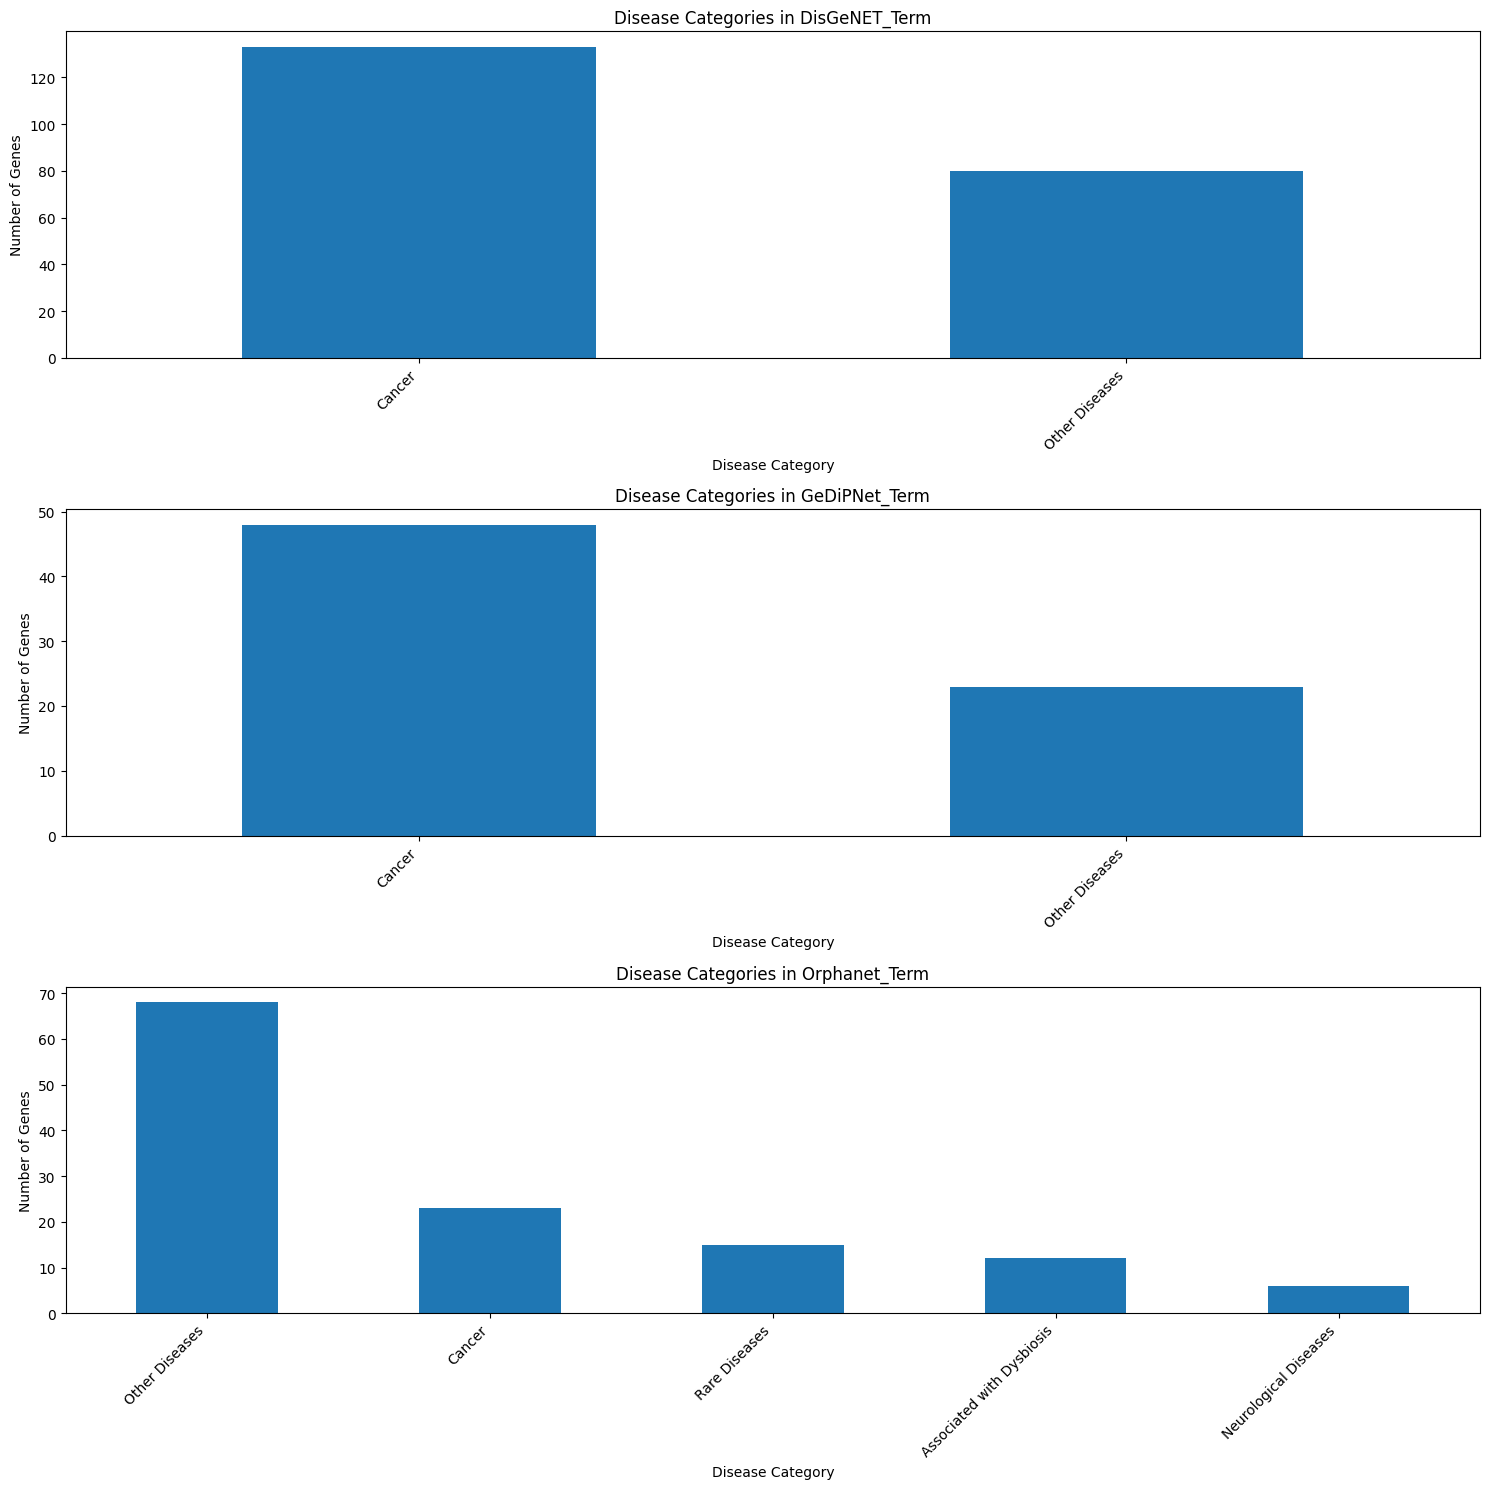

In [5]:
# Define disease categories
categories = {
    "Cancer": ["carcinoma", "cancer", "tumor", "neoplasm", "leukemia", "lymphoma", "sarcoma", "melanoma"],
    "Neurological Diseases": ["neurological", "amyotrophic", "parkinson", "alzheimer", "epilepsy", "schizophrenia", "bipolar disorder", "autism"],
    "Viral Diseases": ["viral", "HIV", "hepatitis", "influenza", "covid", "ebola", "dengue", "zika", "chikungunya"],
    "Pathogenic Bacteria": ["bacterial", "bacteria", "tuberculosis", "streptococcus", "staphylococcus", "pneumonia", "salmonella", "e. coli", "bacterial infection"],
    "Associated with Dysbiosis": ["dysbiosis", "gut microbiota", "intestinal microbiota", "inflammatory bowel disease", "irritable bowel syndrome", "non-alcoholic fatty liver disease", 
                                  "celiac disease", "necrotizing enterocolitis", "helicobacter pylori", "obesity", "diabetes", "anxiety", "stress", "digestive system"],
    "Rare Diseases": ["Ehlers-Danlos syndrome", "Charcot-Marie-Tooth disease", "epidermolysis bullosa", "citrullinemia", "amyloidosis", "glycogen storage disease", 
                       "rare disease", "orphan disease", "nephrotic syndrome", "glomerulonephritis", "autoimmune", "immunodeficiency"],
    "Other Diseases": []  # Unclassified diseases
}

def classify_disease(disease):
    # Check if the disease is NaN or "No information"
    if pd.isna(disease) or disease.lower() == "no information":
        return "No information"
    
    # Convert to lowercase for case-insensitive comparison
    disease = disease.lower()
    
    # Search for matches in the defined categories
    for category, keywords in categories.items():
        if any(keyword in disease for keyword in keywords):
            return category
            
    # If no match found, return "Other Diseases"
    return "Other Diseases"

def process_disease_column(column):
    if pd.isna(column):
        return ["No information"]
    diseases = column.split(';')
    return [disease.strip() for disease in diseases]

# Process disease columns
disease_columns = ['DisGeNET_Term', 'GeDiPNet_Term', 'Orphanet_Term']

for col in disease_columns:
    df[f'{col}_processed'] = df[col].apply(process_disease_column)
    df[f'{col}_categories'] = df[f'{col}_processed'].apply(lambda x: [classify_disease(disease) for disease in x])

# Create a new DataFrame with the mapping
gene_disease_mapping = pd.DataFrame()
gene_disease_mapping['Gene'] = df['Genes']

for col in disease_columns:
    gene_disease_mapping[f'{col}_categories'] = df[f'{col}_categories'].apply(lambda x: ', '.join(set(x)))

# Show the first rows of the new DataFrame
print(gene_disease_mapping.head())

# Count the disease categories for each source, excluding "No information"
category_counts = {}
for col in disease_columns:
    # Exclude "No information"
    filtered_categories = gene_disease_mapping[f'{col}_categories'].apply(
        lambda x: ', '.join([cat for cat in x.split(', ') if cat != 'No information'])
    )
    # Count the categories
    category_counts[col] = filtered_categories.str.get_dummies(sep=', ').sum().sort_values(ascending=False)

# Create a bar plot for each disease source
fig, axes = plt.subplots(len(disease_columns), 1, figsize=(15, 5 * len(disease_columns)))

for i, (source, counts) in enumerate(category_counts.items()):
    ax = axes[i]
    if counts.empty:
        ax.text(0.5, 0.5, 'No data to plot', horizontalalignment='center', verticalalignment='center', fontsize=12)
        ax.set_title(f'Disease Categories in {source}')
        ax.set_xlabel('Disease Category')
        ax.set_ylabel('Number of Genes')
    else:
        counts.plot(kind='bar', ax=ax)
        ax.set_title(f'Disease Categories in {source}')
        ax.set_xlabel('Disease Category')
        ax.set_ylabel('Number of Genes')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('disease_categories_barplot.png')
print("Graph saved as 'disease_categories_barplot.png'")


In [4]:
gene_disease_mapping

,Gene,DisGeNET_Term_categories,GeDiPNet_Term_categories,Orphanet_Term_categories
0,AANAT,Cancer,No information,No information
1,ABCB1,"Cancer, Other Diseases","Cancer, Other Diseases",No information
2,ABCC2,"Cancer, Other Diseases",Cancer,Other Diseases
3,ACSL5,"Cancer, Other Diseases",No information,No information
4,ACTA2,Cancer,"Cancer, Other Diseases",No information
...,...,...,...,...
152,WNT9A,Cancer,No information,Other Diseases
153,ZBED2,No information,No information,Other Diseases
154,ZBTB18,Other Diseases,No information,No information
155,ZCCHC12,No information,Cancer,No information


## Tablas resumen por categoría

Dado que ya tenemos las categorías de enfermedades clasificadas para cada gen, podríamos generar tablas de resumen que permitan obtener una visión general de cuántos genes están asociados a cada categoría de enfermedad

In [6]:
# Function to count the number of genes by category
def count_genes_by_category(df, disease_column_categories):
    category_counts = {}
    for categories in df[disease_column_categories]:
        for category in categories.split(', '):  # Split to handle multiple categories per gene
            category_counts[category] = category_counts.get(category, 0) + 1
    return category_counts

# Create a DataFrame with gene counts by category for each disease column
summary_tables = {}

for col in disease_columns:
    category_counts = count_genes_by_category(gene_disease_mapping, f'{col}_categories')
    summary_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Number of Genes'])
    summary_tables[col] = summary_df

# Display summary tables for each column
for col, summary_df in summary_tables.items():
    print(f"Summary for {col}:")
    print(summary_df)
    print("\n")


Summary for DisGeNET_Term:
         Category  Number of Genes
0          Cancer              133
1  Other Diseases               80
2  No information               20


Summary for GeDiPNet_Term:
         Category  Number of Genes
0  No information              104
1  Other Diseases               23
2          Cancer               48


Summary for Orphanet_Term:
                    Category  Number of Genes
0             No information               87
1             Other Diseases               68
2                     Cancer               23
3  Associated with Dysbiosis               12
4              Rare Diseases               15
5      Neurological Diseases                6




## Explorar genes asociados a múltiples categorías
Podríamos analizar qué genes están asociados a múltiples categorías de enfermedades, lo que podría indicar un rol relevante en diferentes contextos biológicos o patológicos.

In [7]:
# Function to find genes associated with multiple categories
def genes_in_multiple_categories(df, disease_column_categories):
    multiple_categories_genes = df[df[disease_column_categories].apply(lambda x: len(set(x.split(', '))) > 1)]
    return multiple_categories_genes

# Apply the function to each disease column
for col in disease_columns:
    multi_category_genes = genes_in_multiple_categories(gene_disease_mapping, f'{col}_categories')
    print(f"Genes associated with multiple categories in {col}:")
    print(multi_category_genes[['Gene', f'{col}_categories']])
    print("\n")


Genes associated with multiple categories in DisGeNET_Term:
        Gene DisGeNET_Term_categories
1      ABCB1   Other Diseases, Cancer
2      ABCC2   Other Diseases, Cancer
3      ACSL5   Other Diseases, Cancer
5     ADAM15   Other Diseases, Cancer
8    AFAP1L2   Other Diseases, Cancer
..       ...                      ...
142    THBS1   Other Diseases, Cancer
143    TIMP2   Other Diseases, Cancer
147    TRIB3   Other Diseases, Cancer
148  TSC22D1   Other Diseases, Cancer
150    VGLL3   Other Diseases, Cancer

[76 rows x 2 columns]


Genes associated with multiple categories in GeDiPNet_Term:
         Gene GeDiPNet_Term_categories
1       ABCB1   Other Diseases, Cancer
4       ACTA2   Other Diseases, Cancer
10   APOBEC3B   Other Diseases, Cancer
21      CASP7   Other Diseases, Cancer
22      CCND1   Other Diseases, Cancer
34    CYP24A1   Other Diseases, Cancer
52      GPNMB   Other Diseases, Cancer
56       H2AX   Other Diseases, Cancer
57       HPSE   Other Diseases, Cancer
70      K

In [8]:
# Exportar el mapeo completo de genes a CSV
gene_disease_mapping.to_csv('gene_disease_mapping.csv', index=False)

# Exportar las tablas resumen a archivos CSV
for col, summary_df in summary_tables.items():
    summary_df.to_csv(f'summary_{col}.csv', index=False)

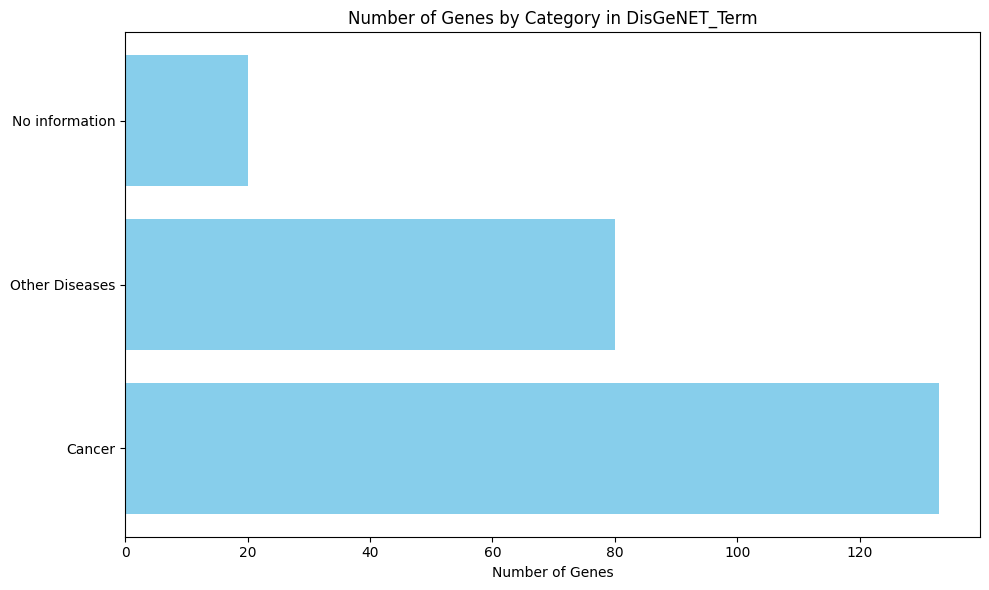

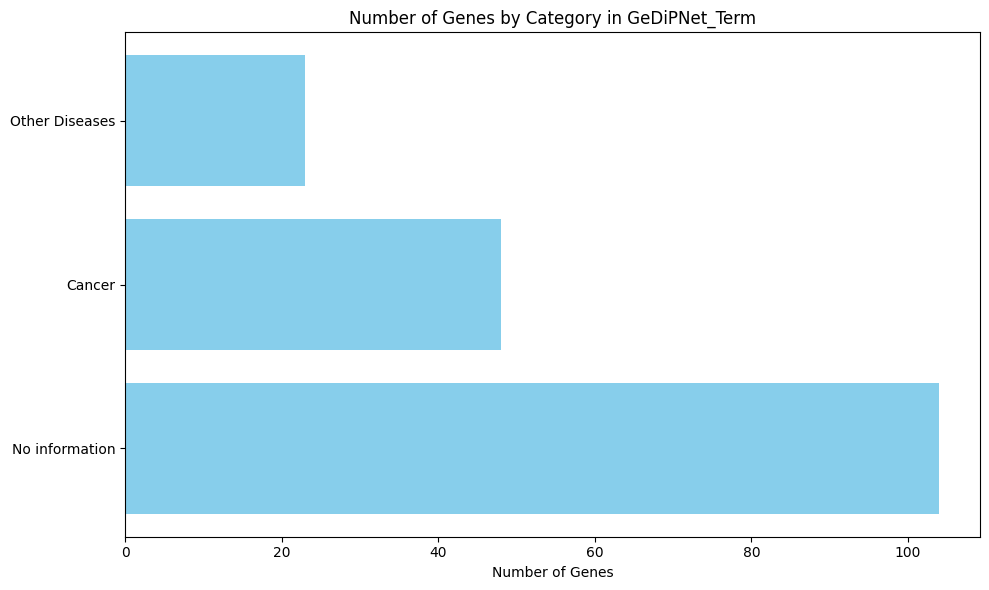

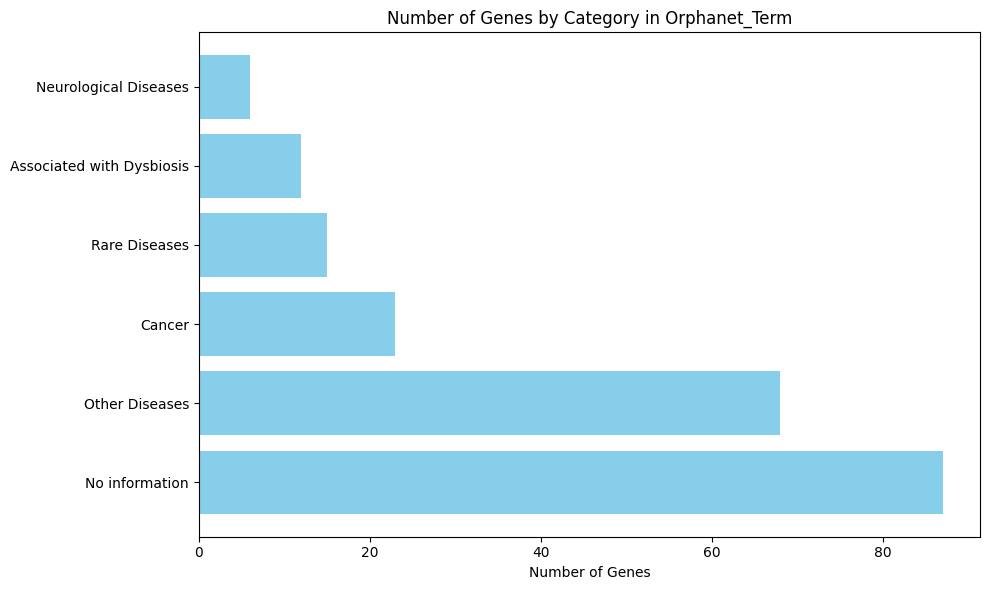

In [7]:

# Function to generate a bar chart by category
def plot_category_distribution(summary_df, title):
    summary_df.sort_values(by='Number of Genes', ascending=False, inplace=True)
    plt.figure(figsize=(10, 6))
    plt.barh(summary_df['Category'], summary_df['Number of Genes'], color='skyblue')
    plt.xlabel('Number of Genes')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Generate bar charts for each disease column
for col, summary_df in summary_tables.items():
    plot_category_distribution(summary_df, f'Number of Genes by Category in {col}')


## Procedimiento para obtener tablas de genes por categoría:
A continuación podemos organizar los genes asociados a cada una de las categorías de enfermedades:

Agrupar los genes por cada categoría: De acuerdo a las categorías que ya definidas en categories, puedemos filtrar los genes que están asociados con las enfermedades correspondientes.

Crear tablas para cada categoría: Para cada categoría de enfermedad, crear un subconjunto del DataFrame que contenga solo los genes relacionados con dicha categoría.

In [9]:
# Inicializar un diccionario para almacenar genes por categoría
genes_by_category = {category: [] for category in categories.keys()}

# Función para agregar genes a las categorías correspondientes
def classify_genes_by_category(row):
    for col in disease_columns:
        for category in row[f'{col}_categories'].split(', '):
            if category in genes_by_category:
                genes_by_category[category].append(row['Gene'])

# Aplicar la función a cada fila del DataFrame
gene_disease_mapping.apply(classify_genes_by_category, axis=1)

# Eliminar duplicados de cada lista de genes por categoría
genes_by_category = {category: list(set(genes)) for category, genes in genes_by_category.items()}

# Mostrar genes agrupados por categoría
for category, genes in genes_by_category.items():
    print(f"Categoría: {category}")
    print(f"Genes: {', '.join(genes)}\n")


Categoría: Cancer
Genes: ID2, RHOU, SKAP1, ADAM15, RTKN2, C1QL1, TET1, RGS6, ICA1, COL12A1, MIR17HG, PBX1, PDGFB, E2F7, CLSPN, GPR37, SHCBP1, KRT13, EFR3B, FZD1, MKNK2, PRR15, SMAD7, CYP4F2, TPM4, SORT1, EHF, SNAI2, DEPDC1B, HTATIP2, TIMP2, KITLG, PLEKHD1, NEU1, P2RX7, ESCO2, ABCB1, MICB, ADAMTS15, NGFR, SCG2, CNTNAP1, KAT2B, APOLD1, MIR100HG, OIP5, KBTBD8, CASP7, LZTS1, AMOTL2, CA2, RGL1, LRIG1, P3H2, BMF, CYP24A1, CEACAM19, STN1, TGM2, FRAT2, UQCC1, FGF19, LPAR5, MT1E, LAMP3, ME1, SLC22A18, SIX2, ITGA2, SPC25, TRAK2, RPSAP52, FHIT, CA11, ENG, BBC3, IQGAP2, ACTA2, AFAP1L2, TRIB3, CENPE, ARL2BP, SUSD4, CORO1A, NR4A2, PLK2, SORL1, CHST11, GAL, ZCCHC12, NOLC1, APOBEC3B, COL5A2, WNT16, DOCK11, NRIP1, ZNF703, RHOBTB3, S100A14, PPP1R14B, GRAMD1B, ABCC2, AANAT, GLI2, KRT23, THBS1, WNT9A, PSMB9, PDE4B, SULT1A1, TSC22D1, OGFR, HPSE, HS3ST1, PIR, ENC1, GPNMB, SNCG, TFAP4, PRMT6, ISL1, PRSS23, PURPL, H2AX, PADI3, PLSCR4, LAMA3, SETD7, VGLL3, CCND1, ACSL5, CPEB4, KCNN4, ADAMTS14, SORBS1, CTSD, HY

In [10]:
# Crear un DataFrame para cada categoría
tables_by_category = {}

for category, genes in genes_by_category.items():
    tables_by_category[category] = pd.DataFrame(genes, columns=['Gene'])

# Mostrar la tabla para una categoría específica (ejemplo: "Cáncer")
print(tables_by_category['Cancer'])


        Gene
0        ID2
1       RHOU
2      SKAP1
3     ADAM15
4      RTKN2
..       ...
137     LIFR
138    SMAD6
139     SKIL
140   TNFSF9
141  IL22RA1

[142 rows x 1 columns]


In [11]:
# Exportar tablas a CSV
for category, table in tables_by_category.items():
    table.to_csv(f'genes_{category}.csv', index=False)


Explorar los genes en las enfermedades raras y neurológicas, cuales son los nombres específicos de las enfermedades raras y neurológicas

In [13]:

import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('Integracion_con_patógenos_y_enfermedades_Fusobacterium_Nucleatum_Padj_menor_0.05.csv')

# Mostrar las primeras filas para verificar la estructura del DataFrame
df.head()

# Columnas que contienen los nombres de las enfermedades
disease_columns = ['DisGeNET_Term', 'GeDiPNet_Term', 'Orphanet_Term']

# Definir una función para extraer las enfermedades según la categoría
def extract_diseases(row, disease_records):
    for col in disease_columns:
        # Extraer los términos de enfermedad
        if pd.notna(row[col]):
            # Manejar tanto separadores ";" como ","
            disease_terms = [disease.strip() for term in row[col].split(';') for disease in term.split(',')]
            for disease in disease_terms:
                # Comprobar la categoría de la enfermedad
                for category, keywords in categories.items():
                    if any(keyword.lower() in disease.lower() for keyword in keywords):
                        # Si se encuentra una categoría, agregar a la lista
                        disease_records.append({
                            "Gene": row['Genes'],
                            "Disease": disease,
                            "Category": category
                        })
                        break  # Salir del bucle una vez que se haya categorizado

# Obtener la lista de genes para enfermedades raras y neurológicas
rare_diseases_genes = genes_by_category["Rare Diseases"]
neurological_diseases_genes = genes_by_category["Neurological Diseases"]
cancer_diseases_genes=genes_by_category["Cancer"]
viral_diseases_genes=genes_by_category["Viral Diseases"]
pathogenic_diseases_genes=genes_by_category["Pathogenic Bacteria"]
dysbiosis_diseases_genes=genes_by_category["Associated with Dysbiosis"]

# Crear una lista para almacenar los registros de enfermedades
disease_records = []

# Procesar los genes y asignar las enfermedades a cada categoría
# Para enfermedades raras
df[df['Genes'].isin(rare_diseases_genes)].apply(
    lambda row: extract_diseases(row, disease_records), axis=1
)

# Para enfermedades neurológicas
df[df['Genes'].isin(neurological_diseases_genes)].apply(
    lambda row: extract_diseases(row, disease_records), axis=1
)
# Para enfermedades de Cancer
df[df['Genes'].isin(cancer_diseases_genes)].apply(
    lambda row: extract_diseases(row, disease_records), axis=1
)
# Para enfermedades virales
df[df['Genes'].isin(viral_diseases_genes)].apply(
    lambda row: extract_diseases(row, disease_records), axis=1
)

# Para enfermedades patogénicas
df[df['Genes'].isin(pathogenic_diseases_genes)].apply(
    lambda row: extract_diseases(row, disease_records), axis=1
)

# Para enfermedades asociadas a la disbiosis
df[df['Genes'].isin(dysbiosis_diseases_genes)].apply(
    lambda row: extract_diseases(row, disease_records), axis=1
)

# Convertir la lista de registros de enfermedades a un DataFrame para analizar
disease_df = pd.DataFrame(disease_records)

# Filtrar el DataFrame para conservar solo las categorías de interés
disease_df_filtered = disease_df[disease_df['Category'].isin(["Rare Diseases", "Neurological Diseases","Cancer","Viral Diseases","Pathogenic Bacteria","Associated with Dysbiosis"])]

# Mostrar las primeras filas del DataFrame filtrado
print(disease_df_filtered.head())

# Guardar el DataFrame filtrado en un archivo Excel
disease_df_filtered.to_excel('genes_rare_neurological_cancer_viral_pathogenic_dysbiosis_diseases.xlsx', index=False)

# Guardar el DataFrame filtrado en un archivo CSV
disease_df_filtered.to_csv('genes_rare_neurological_cancer_viral_pathogenic_dysbiosis_diseases.csv', index=False)

# Filtrar para enfermedades raras y eliminar duplicados
rare_diseases_df = disease_df[disease_df['Category'] == "Rare Diseases"][['Gene', 'Disease']]
rare_diseases_df = rare_diseases_df.drop_duplicates().groupby('Gene')['Disease'].apply(lambda x: ', '.join(x)).reset_index()

# Filtrar para enfermedades neurológicas y eliminar duplicados
neurological_diseases_df = disease_df[disease_df['Category'] == "Neurological Diseases"][['Gene', 'Disease']]
neurological_diseases_df = neurological_diseases_df.drop_duplicates().groupby('Gene')['Disease'].apply(lambda x: ', '.join(x)).reset_index()

# Filtrar para enfermedades cancerígenas y eliminar duplicados
cancer_diseases_df = disease_df[disease_df['Category'] == "Cancer"][['Gene', 'Disease']]
cancer_diseases_df = cancer_diseases_df.drop_duplicates().groupby('Gene')['Disease'].apply(lambda x: ', '.join(x)).reset_index()

# Filtrar para enfermedades virales y eliminar duplicados
viral_diseases_df = disease_df[disease_df['Category'] == "Viral Diseases"][['Gene', 'Disease']]
viral_diseases_df = viral_diseases_df.drop_duplicates().groupby('Gene')['Disease'].apply(lambda x: ', '.join(x)).reset_index()

# Filtrar para enfermedades virales y eliminar duplicados
pathogenic_diseases_df = disease_df[disease_df['Category'] == "Pathogenic Bacteria"][['Gene', 'Disease']]
pathogenic_diseases_df = pathogenic_diseases_df.drop_duplicates().groupby('Gene')['Disease'].apply(lambda x: ', '.join(x)).reset_index()

# Filtrar para enfermedades asociadas a la disbiosis y eliminar duplicados
dysbiosis_diseases_df = disease_df[disease_df['Category'] == "Associated with Dysbiosis"][['Gene', 'Disease']]
dysbiosis_diseases_df = dysbiosis_diseases_df.drop_duplicates().groupby('Gene')['Disease'].apply(lambda x: ', '.join(x)).reset_index()

# Guardar los DataFrames en archivos Excel y CSV
rare_diseases_df.to_excel('genes_rare_diseases.xlsx', index=False)
rare_diseases_df.to_csv('genes_rare_diseases.csv', index=False)

neurological_diseases_df.to_excel('genes_neurological_diseases.xlsx', index=False)
neurological_diseases_df.to_csv('genes_neurological_diseases.csv', index=False)

cancer_diseases_df.to_excel('genes_cancer_diseases.xlsx', index=False)
cancer_diseases_df.to_csv('genes_cancer_diseases.csv', index=False)

viral_diseases_df.to_excel('genes_viral_diseases.xlsx', index=False)
viral_diseases_df.to_csv('genes_viral_diseases.csv', index=False)

pathogenic_diseases_df.to_excel('genes_pathogenic_diseases.xlsx', index=False)
pathogenic_diseases_df.to_csv('genes_pathogenic_diseases.csv', index=False)

dysbiosis_diseases_df.to_excel('genes_dysbiosis_diseases.xlsx', index=False)
dysbiosis_diseases_df.to_csv('genes_dysbiosis_diseases.csv', index=False)


     Gene                                            Disease  \
0  AMOTL2  Interstitial lung disease-nephrotic syndrome-e...   
1  AMOTL2  Neonatal diabetes-congenital hypothyroidism-co...   
2  AMOTL2  Severe generalized junctional epidermolysis bu...   
3  AMOTL2                         Chondrosarcoma ORPHA:55880   
4  AMOTL2           Kindler epidermolysis bullosa ORPHA:2908   

                    Category  
0              Rare Diseases  
1  Associated with Dysbiosis  
2              Rare Diseases  
3                     Cancer  
4              Rare Diseases  


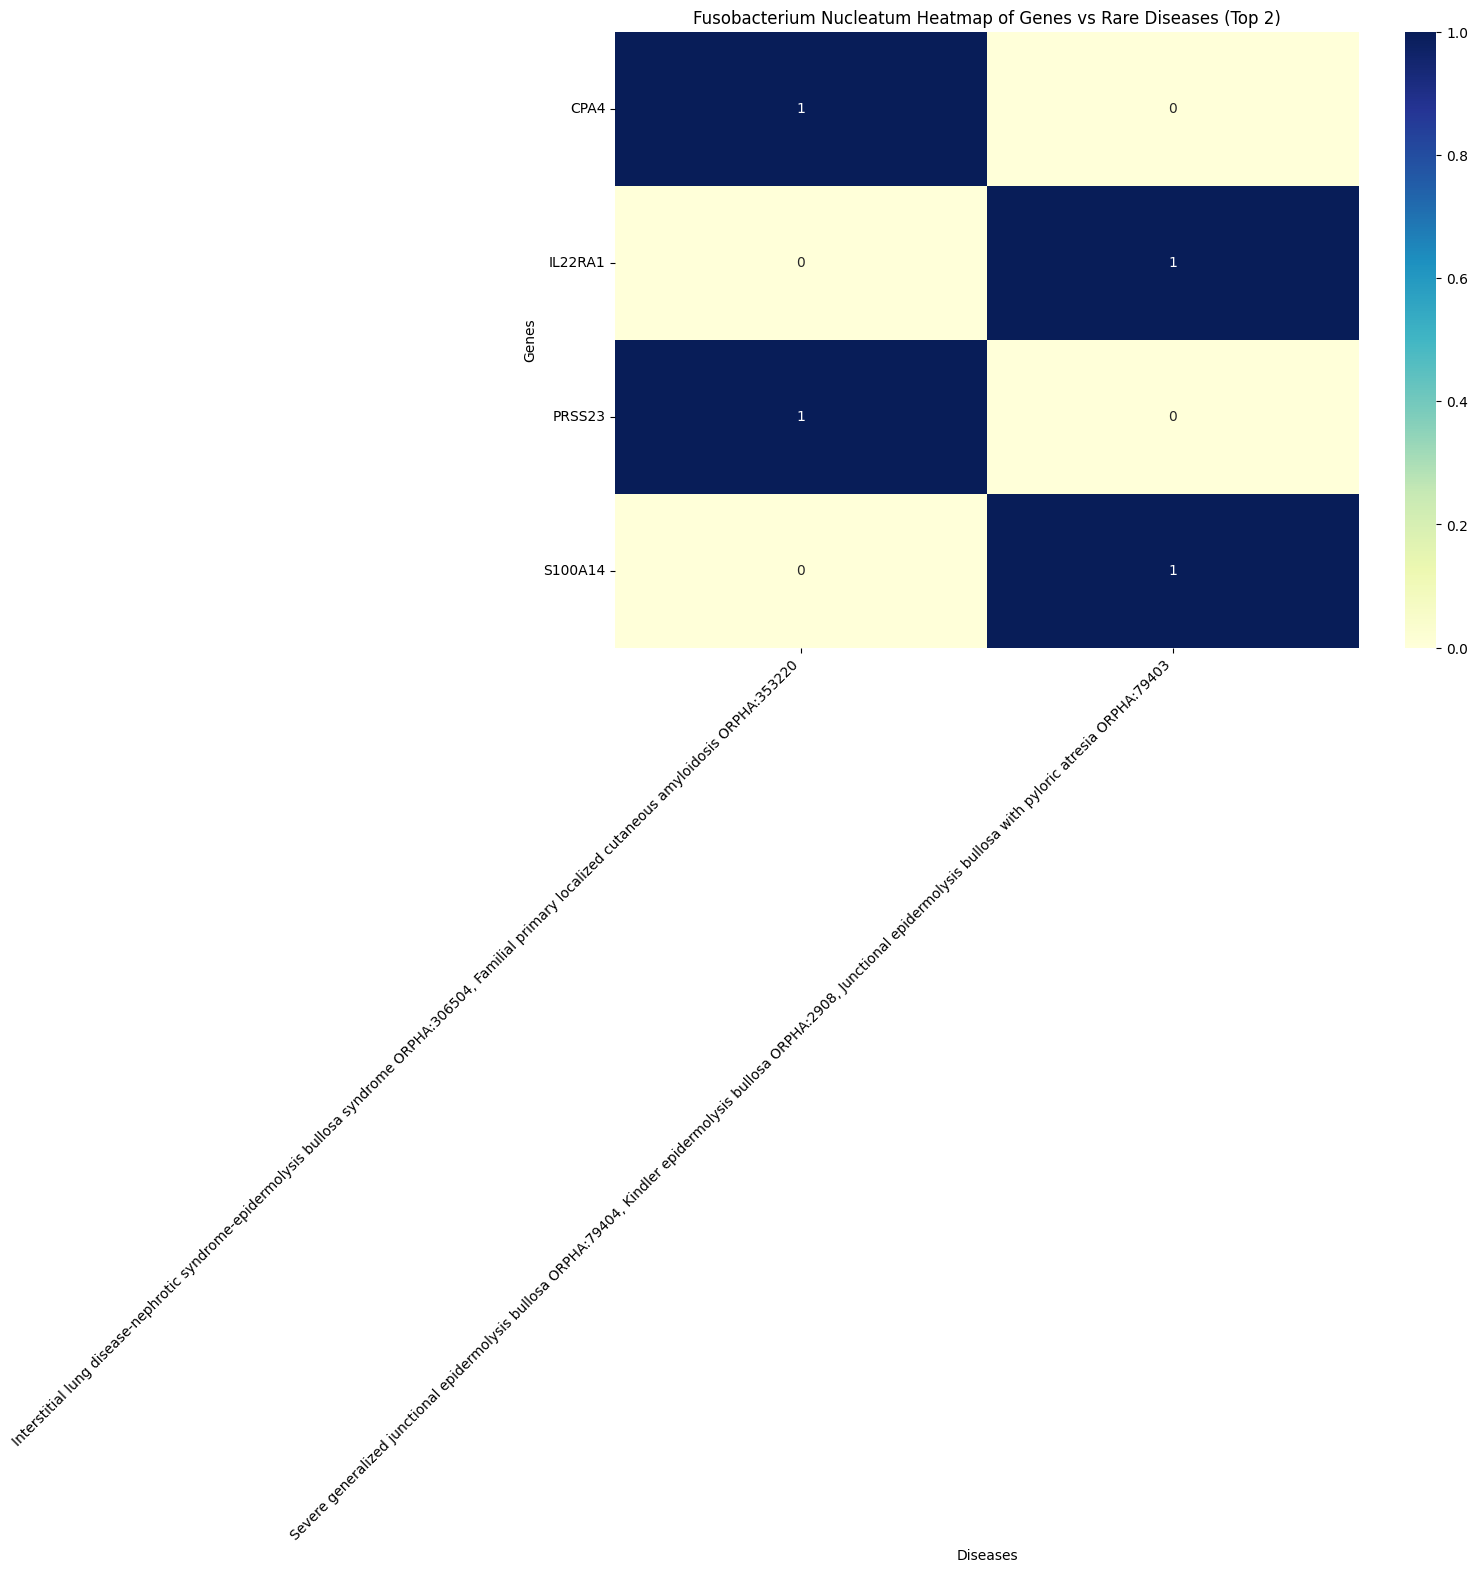

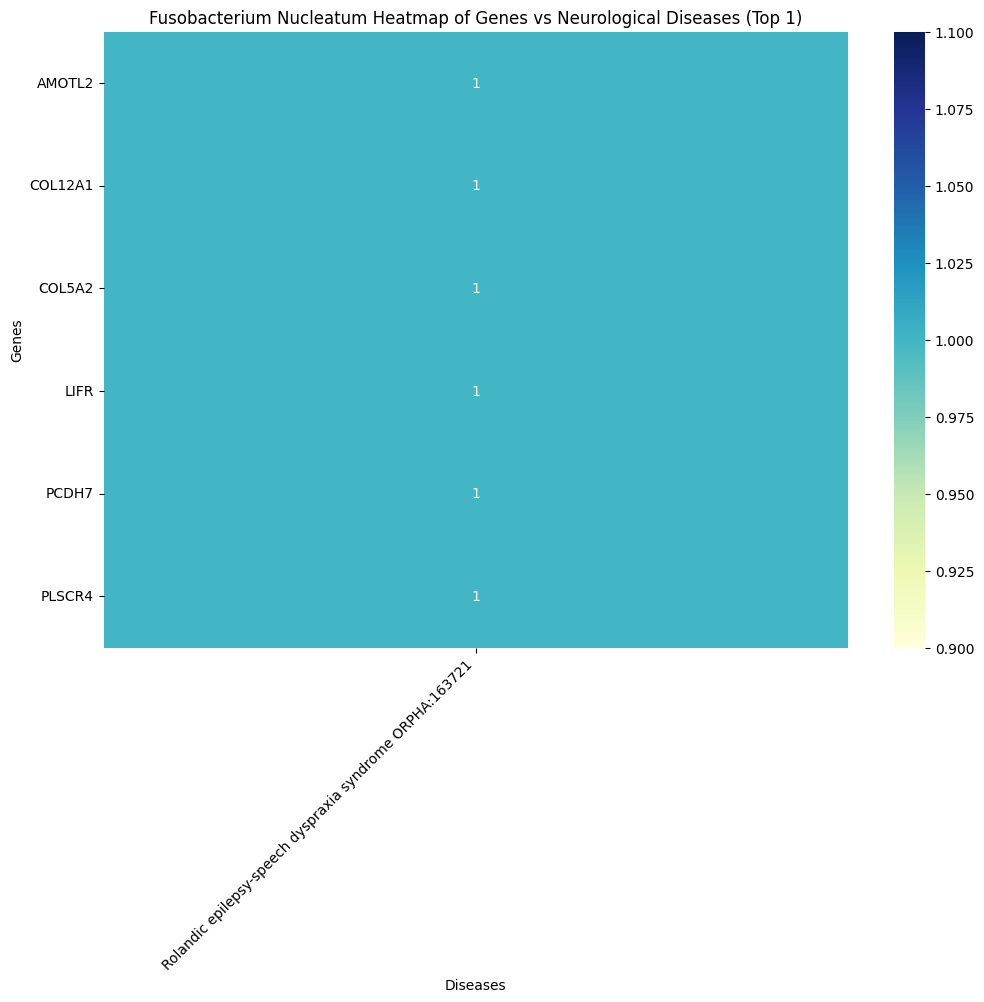

In [17]:
# Definir un umbral
threshold = 1  # Cambia esto según sea necesario

# Función para contar enfermedades y filtrar
def filter_top_diseases(df, threshold):
    disease_counts = df['Disease'].value_counts()
    top_diseases = disease_counts[disease_counts > threshold].index
    return df[df['Disease'].isin(top_diseases)]


# Aplicar el filtrado por top_diseases
filtered_rare_df = filter_top_diseases(rare_diseases_df, threshold)
filtered_neuro_df = filter_top_diseases(neurological_diseases_df, threshold)

# Crear un DataFrame de ejemplo para el heatmap
def create_heatmap_data(df):
    expanded_df = df.explode('Disease')
    heatmap_data = pd.crosstab(expanded_df['Gene'], expanded_df['Disease'])
    return heatmap_data

# Crear heatmaps
rare_heatmap_data = create_heatmap_data(filtered_rare_df)
neuro_heatmap_data = create_heatmap_data(filtered_neuro_df)
num_rare_diseases = len(rare_heatmap_data.columns)
num_neuro_diseases = len(neuro_heatmap_data.columns)

# Crear el heatmap para Enfermedades Raras
plt.figure(figsize=(12, 8))
sns.heatmap(rare_heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title(f"Fusobacterium Nucleatum Heatmap of Genes vs Rare Diseases (Top {num_rare_diseases})")
plt.xlabel("Diseases")
plt.ylabel("Genes")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Crear el heatmap para Enfermedades Neurológicas
plt.figure(figsize=(12, 8))
sns.heatmap(neuro_heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title(f"Fusobacterium Nucleatum Heatmap of Genes vs Neurological Diseases (Top {num_neuro_diseases})")
plt.xlabel("Diseases")
plt.ylabel("Genes")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

DataFrame que contenga todas las categorías de enfermedades, agrupando los genes en una sola estructura:

In [18]:
# Create a list to store gene data and their categories
gene_category_data = []

# Function to add each gene and the categories it belongs to
def append_gene_category_data(row):
    for col in disease_columns:
        for category in row[f'{col}_categories'].split(', '):
            gene_category_data.append([row['Gene'], category])

# Apply the function to add data for each row
gene_disease_mapping.apply(append_gene_category_data, axis=1)

# Create the DataFrame with gene and category data
df_genes_categories = pd.DataFrame(gene_category_data, columns=['Gene', 'Category'])

# Display the first rows of the DataFrame
print(df_genes_categories.head())


    Gene        Category
0  AANAT          Cancer
1  AANAT  No information
2  AANAT  No information
3  ABCB1          Cancer
4  ABCB1  Other Diseases


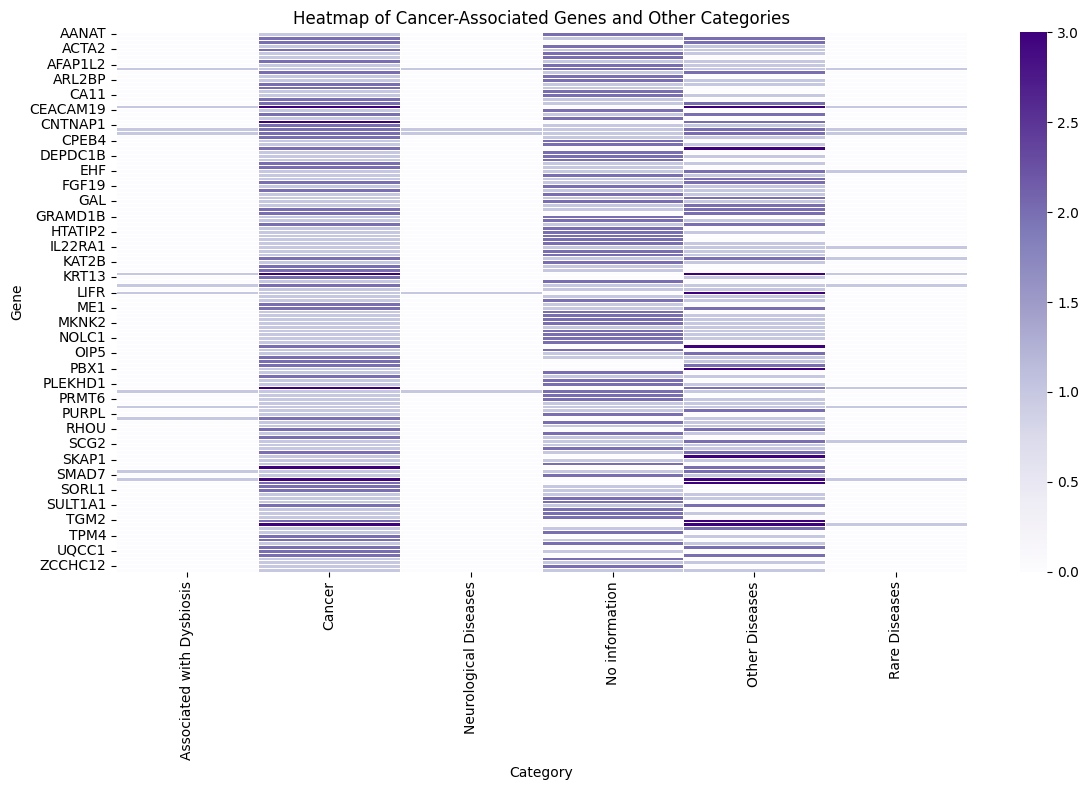

In [19]:

# Paso 1: Filtrar genes asociados a la categoría "Cáncer"
df_cancer_genes = df_genes_categories[df_genes_categories['Category'] == 'Cancer']

# Paso 2: Obtener todos los genes asociados a "Cáncer"
cancer_genes = df_cancer_genes['Gene'].unique()

# Filtrar el DataFrame original para obtener las categorías de estos genes
df_cancer_related_categories = df_genes_categories[df_genes_categories['Gene'].isin(cancer_genes)]

# Paso 3: Crear una tabla pivote (gene-category matrix) donde se muestren las asociaciones
# Esto genera una matriz donde las filas son los genes y las columnas son las categorías
df_pivot = df_cancer_related_categories.pivot_table(index='Gene', columns='Category', aggfunc='size', fill_value=0)

# Paso 4: Generar el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='Purples', linewidths=0.5)
plt.title('Heatmap of Cancer-Associated Genes and Other Categories')
plt.tight_layout()

# Mostrar el heatmap
plt.show()

In [20]:
# Group categories by each gene and combine them into a single comma-separated list
df_genes_grouped = df_genes_categories.groupby('Gene')['Category'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()

# Filter the DataFrame to remove rows with categories "No information" or "Other Diseases"
df_filtered = df_genes_categories[~df_genes_categories['Category'].isin(["No information", "Other Diseases"])]

# Group categories by each gene and combine them into a single comma-separated list
df_genes_grouped = df_filtered.groupby('Gene')['Category'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()

# Display the first rows of the grouped DataFrame
print(df_genes_grouped.head())


    Gene Category
0  AANAT   Cancer
1  ABCB1   Cancer
2  ABCC2   Cancer
3  ACSL5   Cancer
4  ACTA2   Cancer


In [21]:
# Filter genes associated with multiple categories (more than one category)
df_genes_multiple_categories = df_genes_grouped[df_genes_grouped['Category'].apply(lambda x: len(x.split(', ')) > 1)]

# Display genes associated with multiple categories
print("Genes associated with multiple categories:")
print(df_genes_multiple_categories)

# Optional: Display only the genes
common_genes = df_genes_multiple_categories['Gene'].unique()

print("Common genes involved in multiple categories:")
print(common_genes)

# Export to Excel
df_genes_multiple_categories.to_excel('genes_multiple_categories.xlsx', index=False)

# Export to CSV
df_genes_multiple_categories.to_csv('genes_multiple_categories.csv', index=False)

print("Data exported to 'genes_multiple_categories.xlsx' and 'genes_multiple_categories.csv'")

# Export to Excel
df_genes_multiple_categories.to_excel("common_genes.xlsx", index=False)

# Export to CSV
df_genes_multiple_categories.to_csv("common_genes.csv", index=False)

print("Common genes have been exported to 'common_genes.xlsx' and 'common_genes.csv'")


Genes associated with multiple categories:
        Gene                                           Category
9     AMOTL2  Associated with Dysbiosis, Cancer, Neurologica...
19     CCND1   Associated with Dysbiosis, Cancer, Rare Diseases
25   COL12A1  Associated with Dysbiosis, Cancer, Neurologica...
26    COL5A2  Associated with Dysbiosis, Cancer, Neurologica...
37       EHF                              Cancer, Rare Diseases
57   IL22RA1                              Cancer, Rare Diseases
60     ITGA2                              Cancer, Rare Diseases
64     KITLG   Associated with Dysbiosis, Cancer, Rare Diseases
67     LAMA3   Associated with Dysbiosis, Cancer, Rare Diseases
69      LIFR  Associated with Dysbiosis, Cancer, Neurologica...
95      PLK2                              Cancer, Rare Diseases
96    PLSCR4  Associated with Dysbiosis, Cancer, Neurologica...
100   PRSS23   Associated with Dysbiosis, Cancer, Rare Diseases
103     RGL1                  Associated with Dysbiosis, Canc

In [22]:
import openpyxl
df_genes_grouped.to_csv('genes_grouped_by_category.csv', index=False)
df_genes_grouped.to_excel('genes_grouped_by_category.xlsx', index=False)


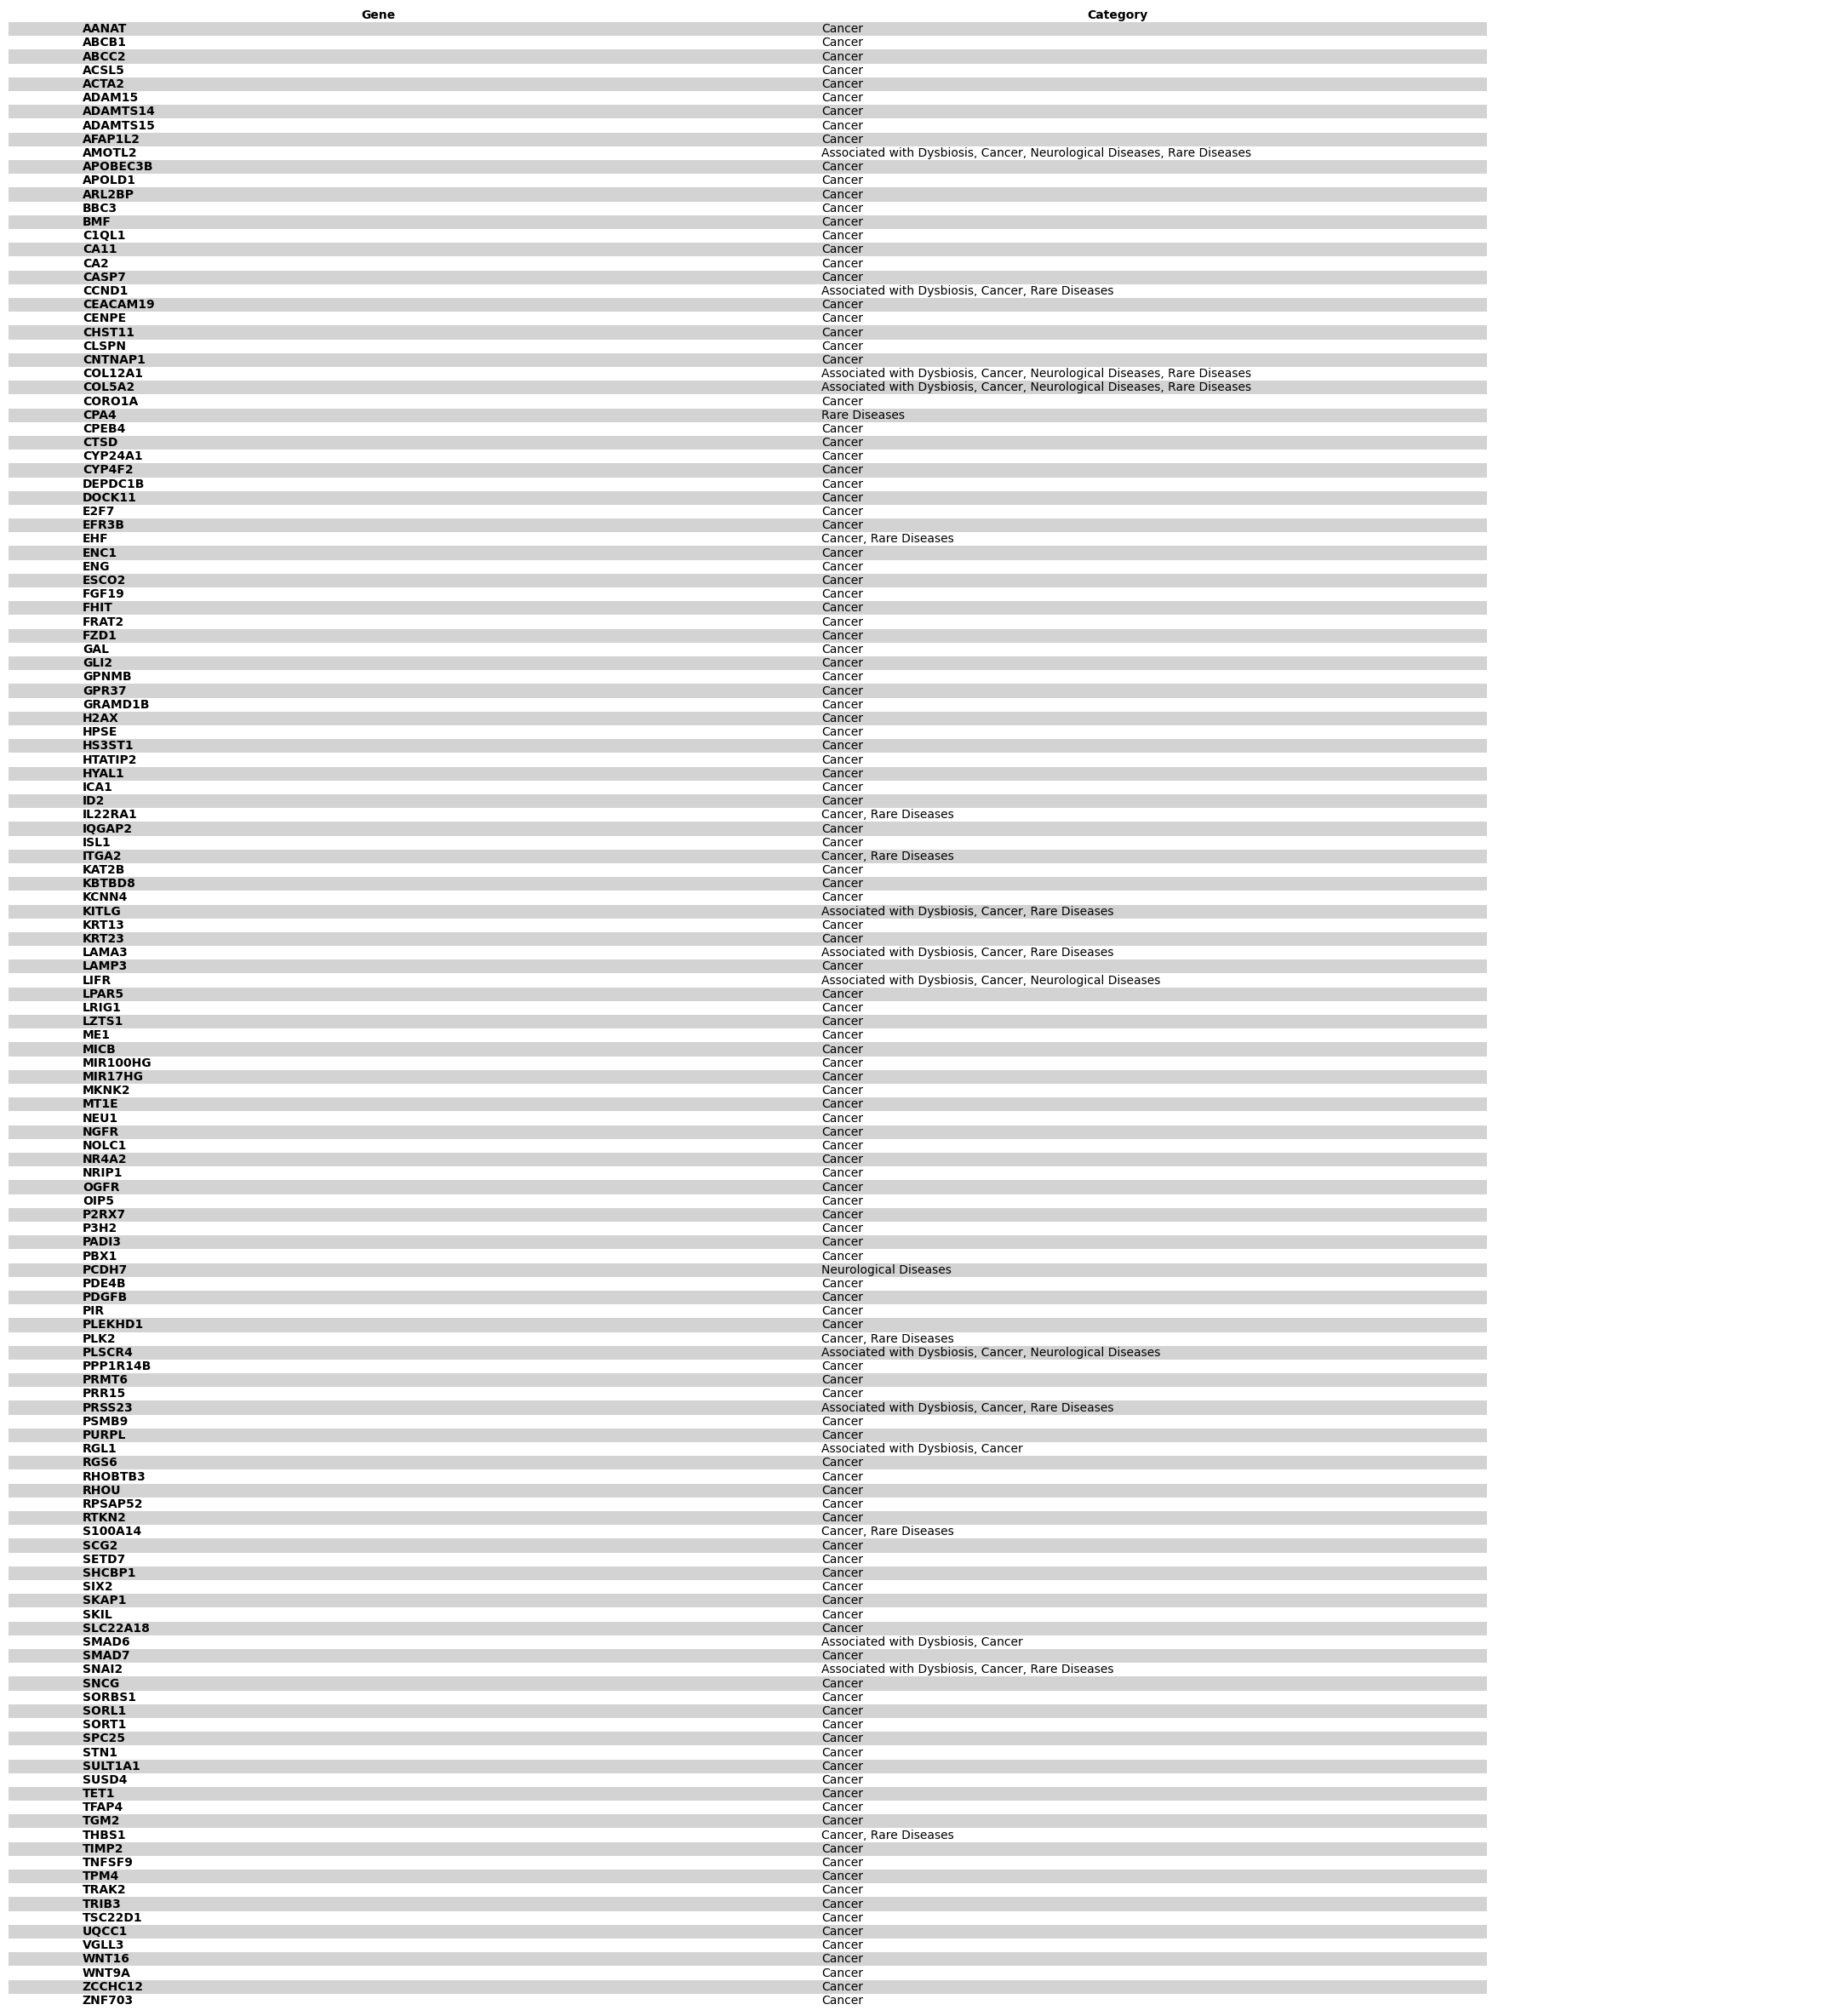

In [27]:

# df_genes_grouped = pd.read_csv('genes_grouped_by_category_filtered.csv')

# Ajustar el tamaño de la figura para evitar tamaño excesivo
fig, ax = plt.subplots(figsize=(19, 15))  # Ajusta el tamaño según sea necesario

# Eliminar los ejes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Crear una lista de colores para el sombreado alternado (sin la fila de encabezados)
num_rows = len(df_genes_grouped)
num_cols = len(df_genes_grouped.columns)
colors = [['white' if i % 2 else 'lightgray' for j in range(num_cols)] for i in range(num_rows)]

# Añadir la tabla a la figura
table = plt.table(cellText=df_genes_grouped.values, 
                  colLabels=df_genes_grouped.columns, 
                  cellLoc='left', 
                  loc='left',
                  cellColours= colors)  # Añadir la fila de encabezados en blanco

# Estilo de las celdas
for (i, j), val in np.ndenumerate(df_genes_grouped.values):
    if i == 0:  # La primera fila (títulos) en negrilla
        table[(i, j)].set_text_props(weight='bold')
    if j == 0:  # La primera columna (Gene) en negrilla
        table[(i + 1, j)].set_text_props(weight='bold')
    table[(i + 1, j)].set_fontsize(12)  # Ajustar el tamaño de la fuente de los datos

# Ajustar el estilo de las líneas
for key, cell in table._cells.items():
    cell.set_edgecolor('none')  # Eliminar el borde de todas las celdas

# Ajustar el tamaño de la tabla para evitar imagen demasiado grande
plt.tight_layout(pad=0.5)

# Ajustar el tamaño de las celdas y la fuente
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(4.2, 5)  # Ajustar escala si es necesario

# Guardar la tabla como imagen
plt.savefig('genes_grouped_table.png', bbox_inches='tight', dpi=300)

# Mostrar la imagen
plt.show()


Heatmap guardado como 'protein_interaction_heatmap.png'


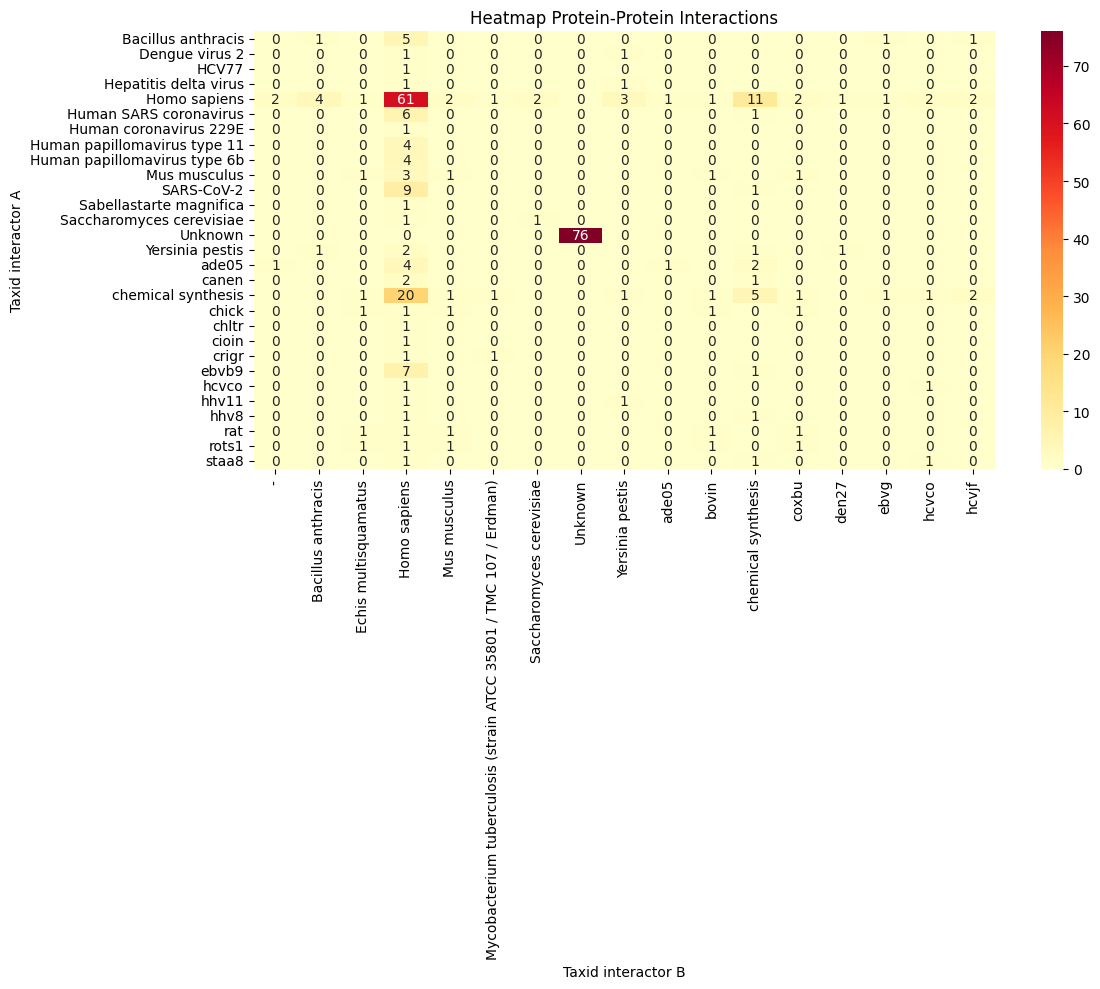

In [28]:
# Función para procesar los campos de taxa que pueden tener múltiples valores separados por ';'
def process_taxid_column(column):
    taxa = column.split(';')
    return [taxon.strip() for taxon in taxa]

# Procesar las columnas de interacciones para manejar múltiples taxones
interaction_df = df[['Genes', 'Taxid interactor A_Intact', 'Taxid interactor B_Intact']].copy()

# Rellenar valores nulos con 'Unknown' y separar los taxones
interaction_df['Taxid interactor A_Intact'] = interaction_df['Taxid interactor A_Intact'].fillna('Unknown').apply(process_taxid_column)
interaction_df['Taxid interactor B_Intact'] = interaction_df['Taxid interactor B_Intact'].fillna('Unknown').apply(process_taxid_column)

# Expandir el DataFrame para tener una fila por cada combinación de taxa en interactor A e interactor B
interaction_df = interaction_df.explode('Taxid interactor A_Intact').explode('Taxid interactor B_Intact')

# Crear la matriz de interacciones
interaction_matrix = pd.crosstab(interaction_df['Taxid interactor A_Intact'], interaction_df['Taxid interactor B_Intact'])

# Generar el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(interaction_matrix, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap Protein-Protein Interactions')
plt.xlabel('Taxid interactor B')
plt.ylabel('Taxid interactor A')
plt.tight_layout()
plt.savefig('protein_interaction_heatmap.png')
print("Heatmap guardado como 'protein_interaction_heatmap.png'")



Contenido de confidence_matrix:
Taxid interactor B_Intact            - Bacillus anthracis  \
Taxid interactor A_Intact                                   
Bacillus anthracis                 NaN               0.37   
Dengue virus 2                     NaN                NaN   
HCV77                              NaN                NaN   
Hepatitis delta virus              NaN                NaN   
Homo sapiens                  0.466667              0.366   
Human SARS coronavirus             NaN                NaN   
Human coronavirus 229E             NaN                NaN   
Human papillomavirus type 11       NaN                NaN   
Human papillomavirus type 6b       NaN                NaN   
Mus musculus                       NaN                NaN   
SARS-CoV-2                         NaN                NaN   
Sabellastarte magnifica            NaN                NaN   
Saccharomyces cerevisiae           NaN                NaN   
Unknown                            NaN               

C:\Users\3060\AppData\Local\Temp\ipykernel_19828\1775578015.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  confidence_matrix = confidence_matrix.fillna(0)


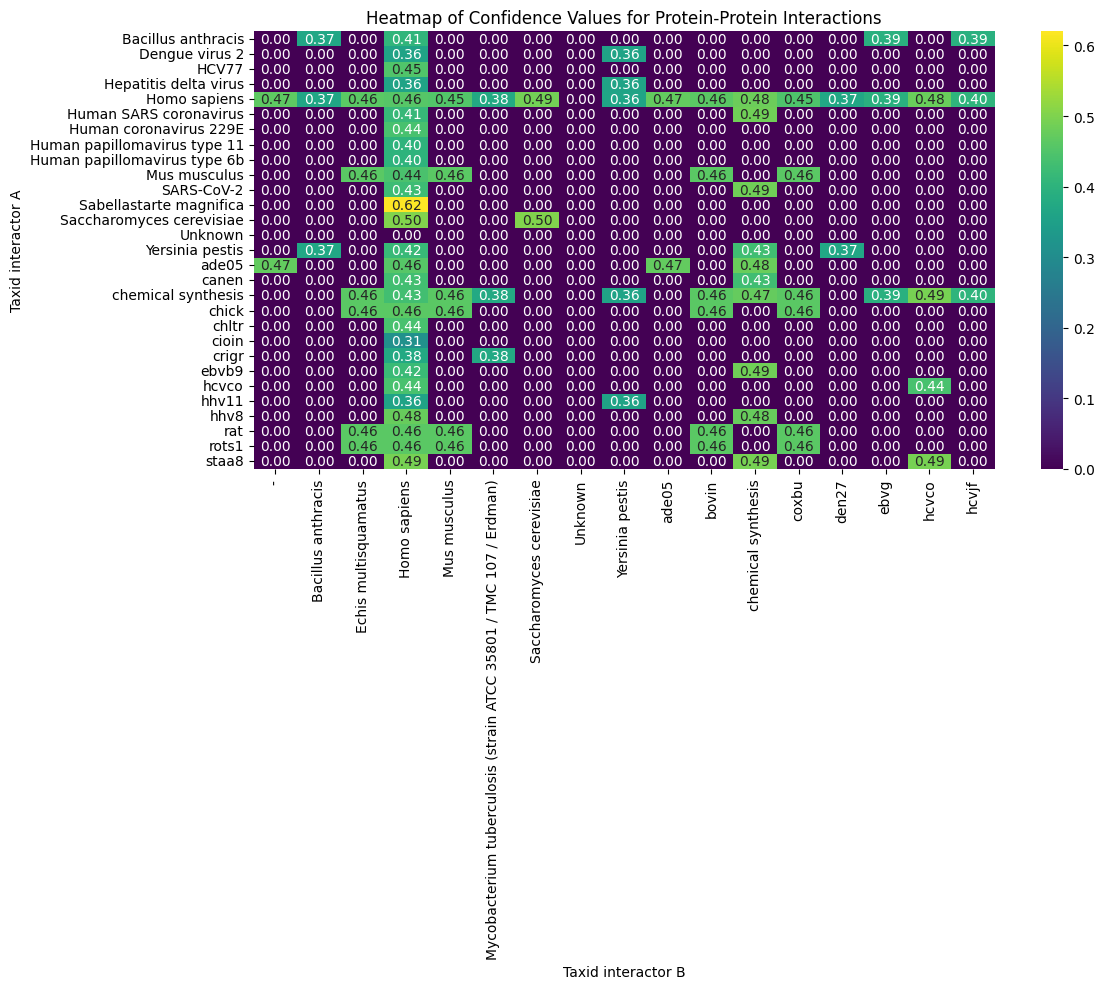

In [29]:


# Función para procesar columnas que contienen listas separadas por ";"
def process_column(column):
    if isinstance(column, str):
        return [item.strip() for item in column.split(';')]
    return []

# Función para procesar las columnas de confianza
def process_confidence_column(column):
    if isinstance(column, str):
        return [float(conf) for conf in process_column(column)]
    return []

# Procesar las columnas de interacciones para manejar múltiples taxones
interaction_df = df[['Genes', 'Taxid interactor A_Intact', 'Taxid interactor B_Intact', 'Confidence value(s)_Intact', 'Host organism(s)_Intact']].copy()

# Procesar las columnas de interacciones para manejar múltiples valores
interaction_df['Taxid interactor A_Intact'] = interaction_df['Taxid interactor A_Intact'].fillna('Unknown').apply(process_column)
interaction_df['Taxid interactor B_Intact'] = interaction_df['Taxid interactor B_Intact'].fillna('Unknown').apply(process_column)
interaction_df['Confidence value(s)_Intact'] = interaction_df['Confidence value(s)_Intact'].fillna('0').apply(process_confidence_column)

# Expandir el DataFrame para tener una fila por cada combinación de taxones y valores de confianza
interaction_df = interaction_df.explode('Taxid interactor A_Intact')
interaction_df = interaction_df.explode('Taxid interactor B_Intact')
interaction_df = interaction_df.explode('Confidence value(s)_Intact')

# Asegurarse de que las columnas no contengan listas
interaction_df['Taxid interactor A_Intact'] = interaction_df['Taxid interactor A_Intact'].astype(str)
interaction_df['Taxid interactor B_Intact'] = interaction_df['Taxid interactor B_Intact'].astype(str)

# Crear la matriz de confianza entre Taxid interactor A y Taxid interactor B
confidence_matrix = pd.pivot_table(interaction_df, values='Confidence value(s)_Intact', index='Taxid interactor A_Intact', columns='Taxid interactor B_Intact', aggfunc='mean')

# Verificar el contenido de la matriz de confianza
print("Contenido de confidence_matrix:")
print(confidence_matrix)

# Manejar valores NaN en la matriz de confianza
confidence_matrix = confidence_matrix.fillna(0)

# Generar el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(confidence_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Confidence Values for Protein-Protein Interactions')
plt.xlabel('Taxid interactor B')
plt.ylabel('Taxid interactor A')
plt.tight_layout()
plt.savefig('protein_interaction_confidence_heatmap.png')
plt.show()  # Mostrar el gráfico en lugar de solo guardarlo





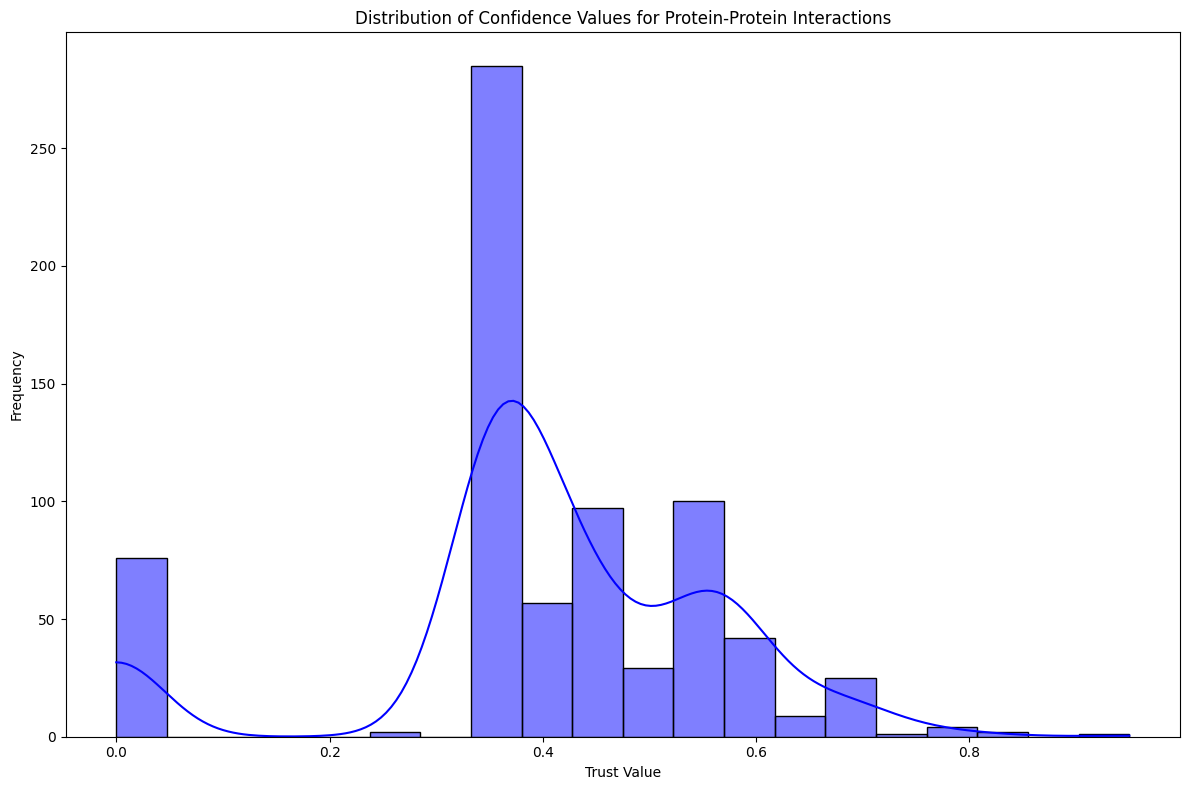

In [30]:
# Asumiendo que 'interaction_df' ya está procesado
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras para la distribución de valores de confianza
sns.histplot(interaction_df['Confidence value(s)_Intact'], bins=20, kde=True, color='b')
plt.title('Distribution of Confidence Values for Protein-Protein Interactions')
plt.xlabel('Trust Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('confidence_distribution_bar_plot.png')
plt.show()

Taxid interactor A_Intact      object
Taxid interactor B_Intact      object
Confidence value(s)_Intact    float64
dtype: object
(730, 3)


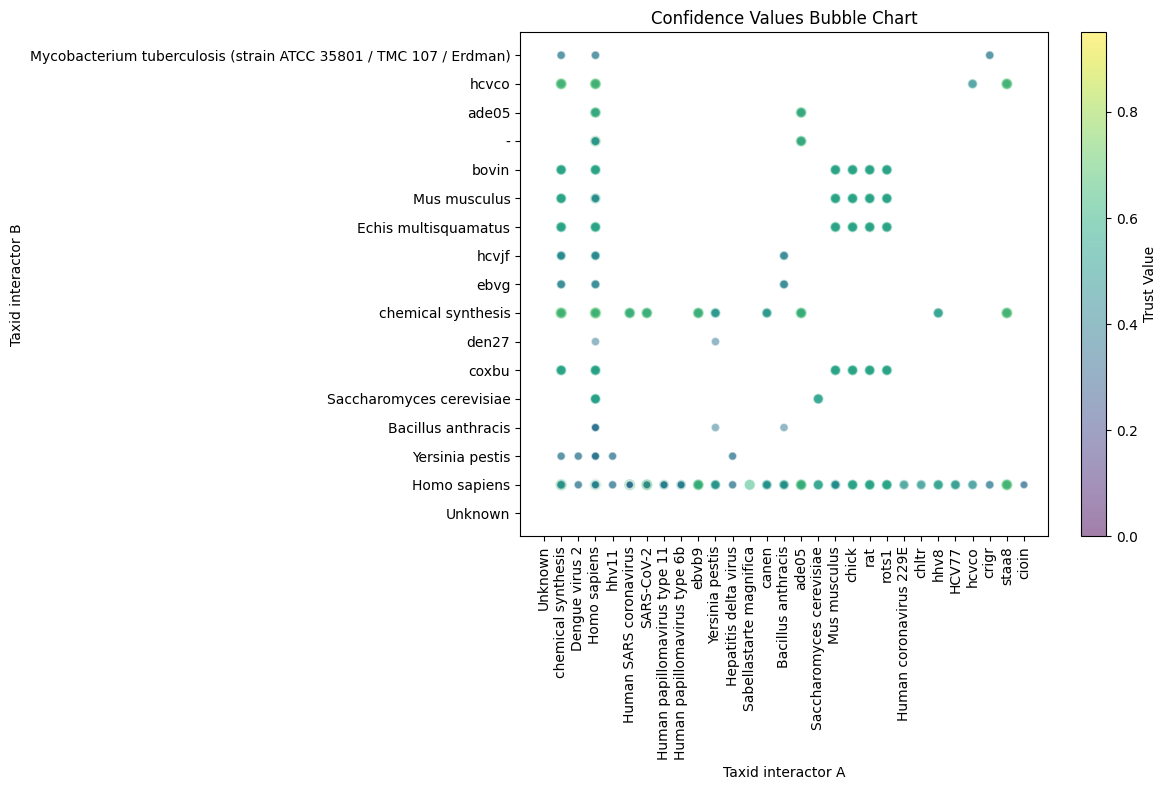

In [31]:
# Convertir la columna 'Confidence value(s)_Intact' a tipo numérico
interaction_df['Confidence value(s)_Intact'] = pd.to_numeric(interaction_df['Confidence value(s)_Intact'], errors='coerce')

# Eliminar filas con valores nulos en 'Confidence value(s)_Intact'
interaction_df = interaction_df.dropna(subset=['Confidence value(s)_Intact'])

# Verificar los tamaños y tipos después de la conversión
print(interaction_df[['Taxid interactor A_Intact', 'Taxid interactor B_Intact', 'Confidence value(s)_Intact']].dtypes)
print(interaction_df[['Taxid interactor A_Intact', 'Taxid interactor B_Intact', 'Confidence value(s)_Intact']].shape)

# Crear el gráfico de burbujas
plt.figure(figsize=(12, 8))

plt.scatter(
    interaction_df['Taxid interactor A_Intact'],
    interaction_df['Taxid interactor B_Intact'],
    s=interaction_df['Confidence value(s)_Intact'] * 100,  # Tamaño de la burbuja
    alpha=0.5,
    c=interaction_df['Confidence value(s)_Intact'],  # Color según el valor de confianza
    cmap='viridis',  # Mapa de colores
    edgecolors='w'
)

plt.title('Confidence Values Bubble Chart')
plt.xlabel('Taxid interactor A')
plt.ylabel('Taxid interactor B')
plt.colorbar(label='Trust Value')

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('confidence_bubble_chart.png')
plt.show()

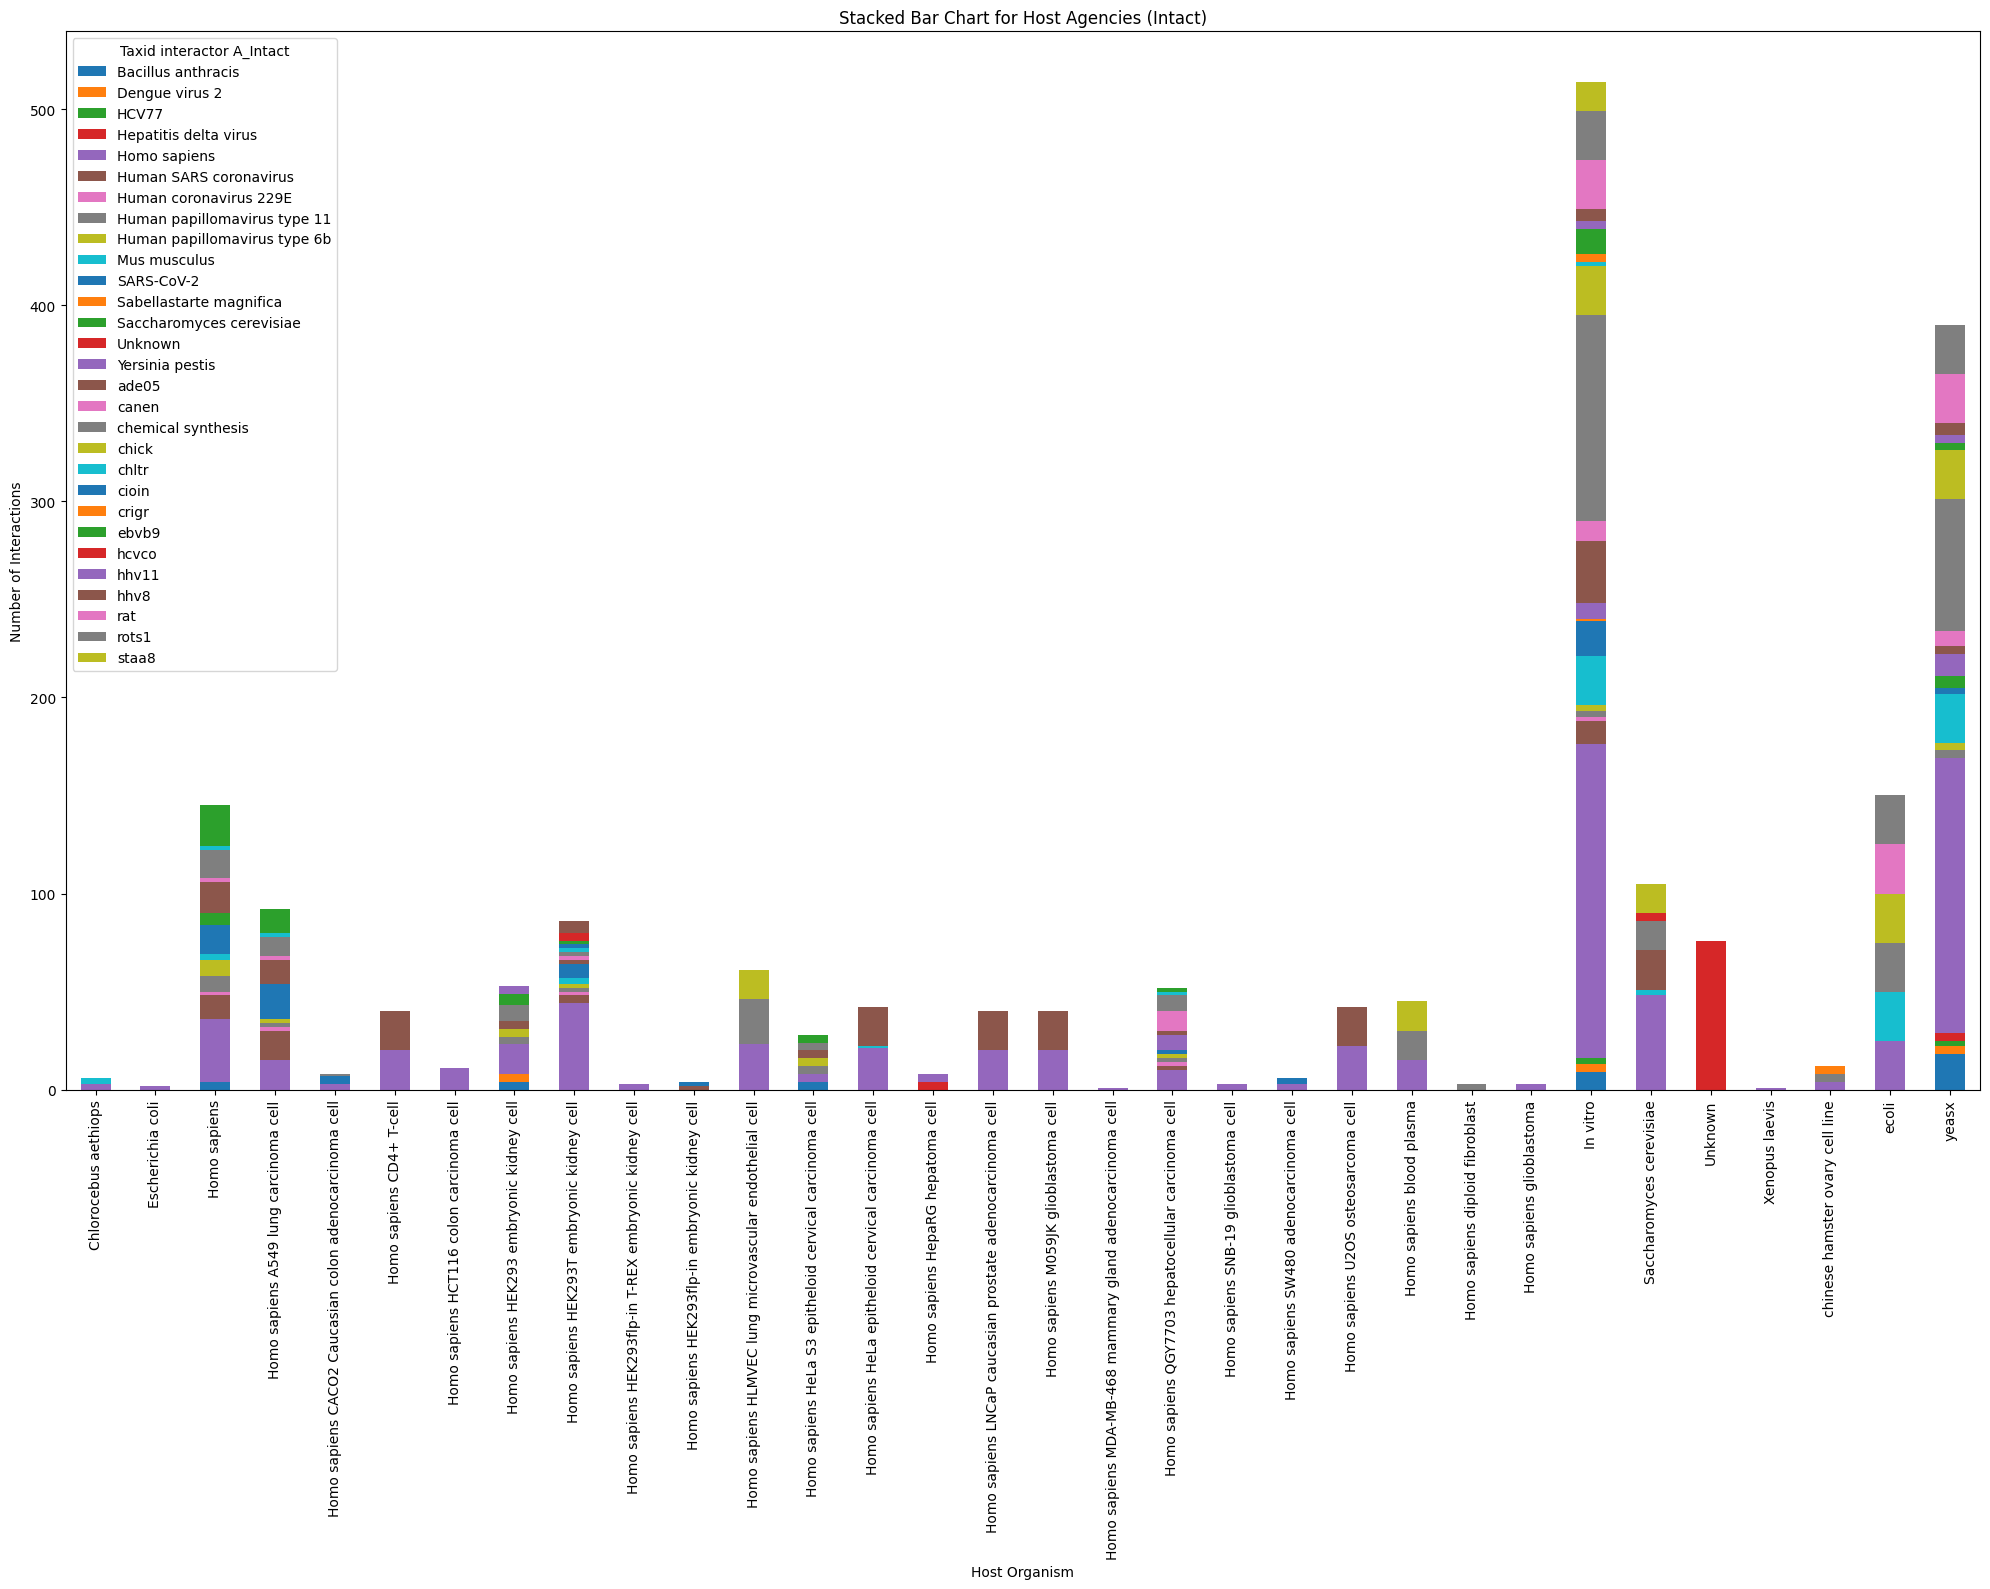

In [32]:
# Supongamos que tienes una columna 'Host organism(s)_Intact' en 'interaction_df'
interaction_df['Host organism(s)_Intact'] = interaction_df['Host organism(s)_Intact'].fillna('Unknown').apply(process_column)

# Expandir los organismos anfitriones
interaction_df = interaction_df.explode('Host organism(s)_Intact')

# Crear una tabla de datos para el gráfico apilado
host_data = interaction_df.groupby(['Host organism(s)_Intact', 'Taxid interactor A_Intact']).size().unstack(fill_value=0)

# Generar el gráfico de barras apiladas
host_data.plot(kind='bar', stacked=True, figsize=(20, 16))
plt.title('Stacked Bar Chart for Host Agencies (Intact)')
plt.xlabel('Host Organism')
plt.ylabel('Number of Interactions')
plt.tight_layout()
plt.savefig('stacked_bar_plot_host_organisms.png')
plt.show()

<Figure size 2400x2200 with 0 Axes>

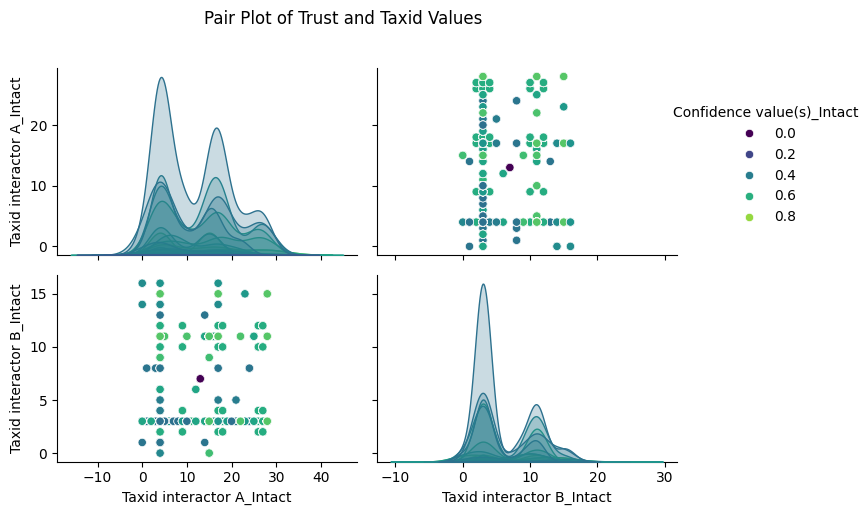

In [33]:
# Crear un DataFrame con valores numéricos para Pair Plot
pair_plot_df = interaction_df[['Taxid interactor A_Intact', 'Taxid interactor B_Intact', 'Confidence value(s)_Intact']].copy()

# Convertir los taxones a categorías para el pairplot
pair_plot_df['Taxid interactor A_Intact'] = pair_plot_df['Taxid interactor A_Intact'].astype('category').cat.codes
pair_plot_df['Taxid interactor B_Intact'] = pair_plot_df['Taxid interactor B_Intact'].astype('category').cat.codes

# Ajustar el tamaño de la figura
plt.figure(figsize=(24, 22))  # Ajusta el tamaño según tus necesidades

# Generar el Pair Plot
pair_plot = sns.pairplot(pair_plot_df, hue='Confidence value(s)_Intact', palette='viridis')

# Añadir título
pair_plot.fig.suptitle('Pair Plot of Trust and Taxid Values', y=1.02)

# Ajustar la posición de la leyenda
pair_plot._legend.set_bbox_to_anchor((1.25, 0.7))  # Ajusta la posición (x, y) según sea necesario

# Ajustar el layout
plt.tight_layout()
plt.savefig('pair_plot_confidence_taxid.png')
plt.show()

Heatmap guardado como 'gene_virus_host_heatmap.png'


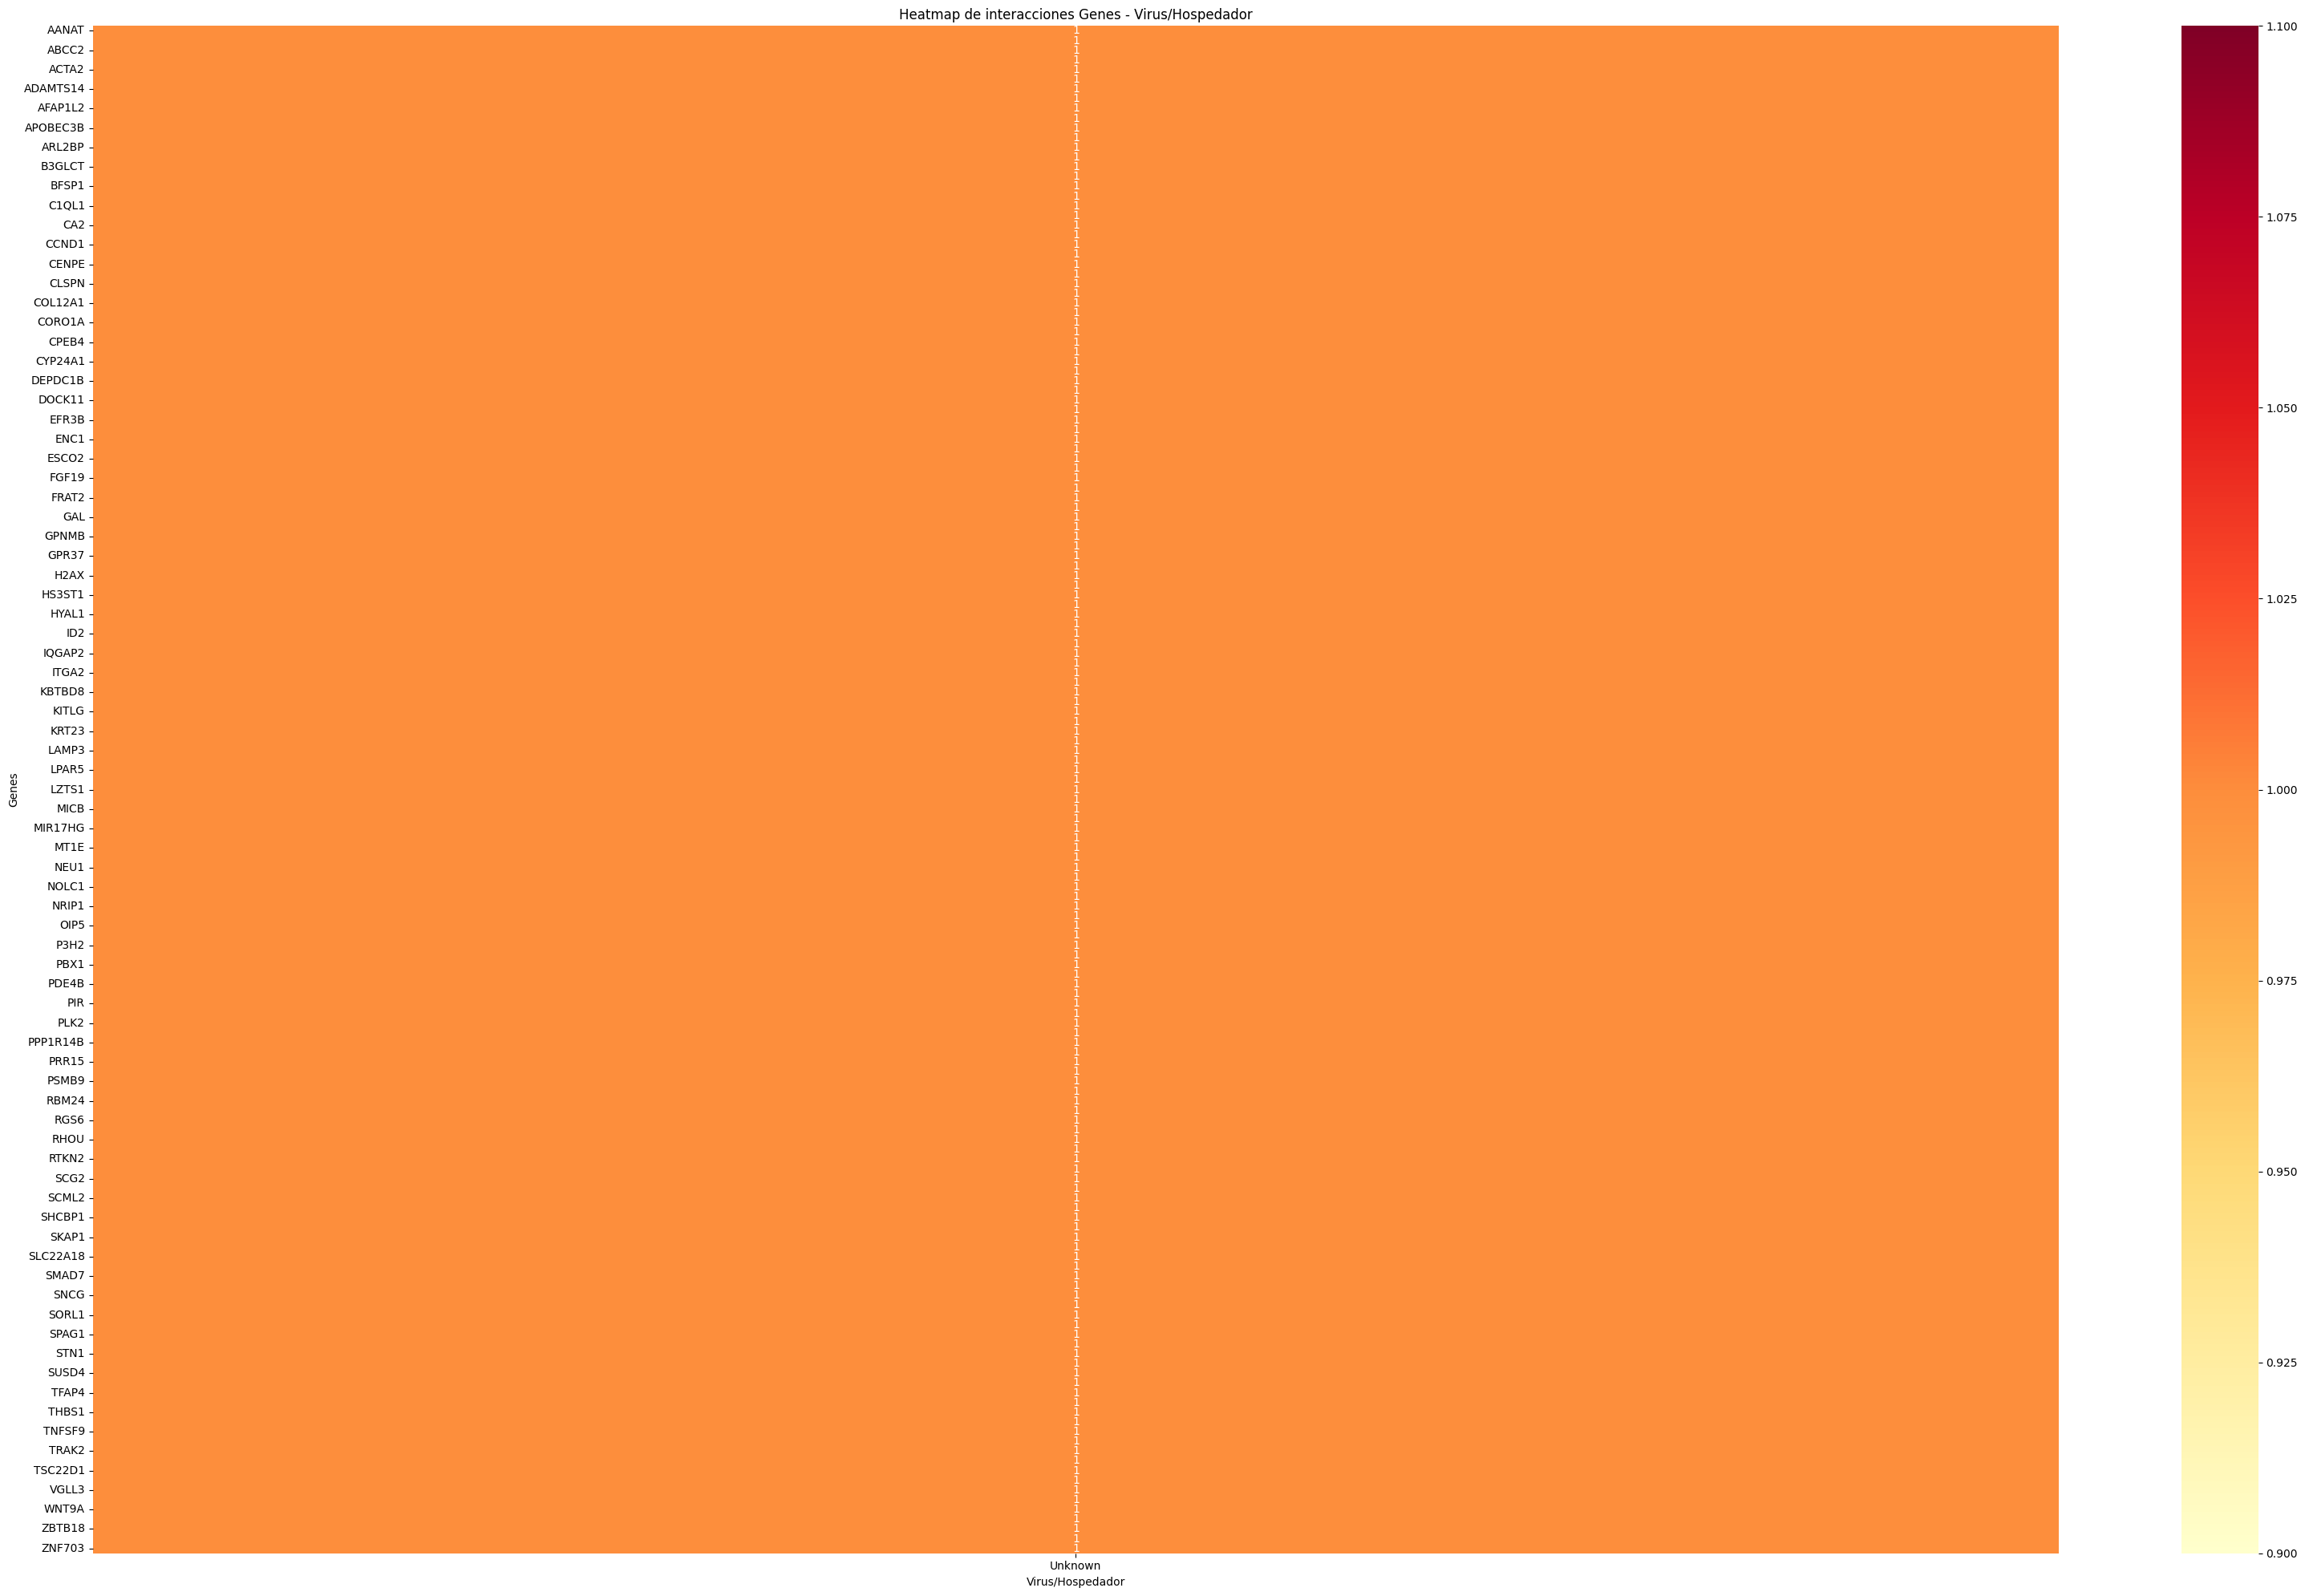

In [34]:
# Procesar las columnas de genes y términos de virus/hospedador para manejar múltiples valores
def process_column(column):
    terms = column.split(';')
    return [term.strip() for term in terms]

# Crear una copia del DataFrame y procesar las columnas relevantes
interaction_df = df[['Genes', 'Virus_Host_Term']].copy()

# Rellenar valores nulos con 'Unknown' y separar los términos
interaction_df['Genes'] = interaction_df['Genes'].fillna('Unknown')
interaction_df['Virus_Host_Term'] = interaction_df['Virus_Host_Term'].fillna('Unknown').apply(process_column)

# Expandir el DataFrame para tener una fila por cada combinación de genes y términos de virus/hospedador
interaction_df = interaction_df.explode('Genes').explode('Virus_Host_Term')

# Crear la matriz de interacciones entre Genes y Virus_Host_Term
interaction_matrix = pd.crosstab(interaction_df['Genes'], interaction_df['Virus_Host_Term'])

# Generar el heatmap
plt.figure(figsize=(32, 20))
sns.heatmap(interaction_matrix, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap de interacciones Genes - Virus/Hospedador')
plt.xlabel('Virus/Hospedador')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('gene_virus_host_heatmap.png')
print("Heatmap guardado como 'gene_virus_host_heatmap.png'")


In [35]:
def process_column(column):
    if pd.isna(column):
        return []  # Manejo de valores NaN
    return [item.strip() for item in column.split(';')]

def filter_top_interactions(df, top_n=50):
    df_expanded = df.copy()
    df_expanded['Virus_Host_Term'] = df_expanded['Virus_Host_Term'].apply(process_column)
    df_expanded['Virus_Host_Pvalue_Adjusted'] = df_expanded['Virus_Host_Pvalue_Adjusted'].apply(lambda x: [float(p) if p.strip() else float('nan') for p in process_column(x)])
    
    df_expanded = df_expanded.explode('Genes')
    df_expanded = df_expanded.explode('Virus_Host_Term')
    df_expanded = df_expanded.explode('Virus_Host_Pvalue_Adjusted')
    
    df_expanded = df_expanded.dropna(subset=['Virus_Host_Pvalue_Adjusted'])  # Eliminar filas con Pvalue NaN
    df_expanded['Virus_Host_Pvalue_Adjusted'] = df_expanded['Virus_Host_Pvalue_Adjusted'].astype(float)  # Convertir a float
    
    df_filtered = df_expanded.sort_values(by='Virus_Host_Pvalue_Adjusted').groupby(['Genes', 'Virus_Host_Term']).first().reset_index()
    df_filtered = df_filtered.nsmallest(top_n, 'Virus_Host_Pvalue_Adjusted')
    
    return df_filtered

# Aplicar el filtro para obtener las mejores 50 interacciones
interaction_df = df[['Genes', 'Virus_Host_Term', 'Virus_Host_Pvalue_Adjusted']].copy()
filtered_df = filter_top_interactions(interaction_df, top_n=50)

# Verificar si filtered_df está vacío
if filtered_df.empty:
    print("El DataFrame filtrado está vacío. No se puede generar el heatmap.")
else:
    # Crear la matriz de interacciones entre Genes y Virus_Host_Term
    interaction_matrix = pd.crosstab(filtered_df['Genes'], filtered_df['Virus_Host_Term'])
    
    # Generar el heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(interaction_matrix, annot=True, cmap='YlOrRd', fmt='d')
    plt.title('Heatmap of top 50 Genes - Virus/Host interactions (based on Pvalue_Adjusted)')
    plt.xlabel('Virus/Host')
    plt.ylabel('Genes')
    plt.tight_layout()
    plt.savefig('top50_gene_virus_host_heatmap.png')
    print("Heatmap guardado como 'top50_gene_virus_host_heatmap.png'")

El DataFrame filtrado está vacío. No se puede generar el heatmap.


C:\Users\3060\AppData\Local\Temp\ipykernel_19828\1454450765.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=filtered_df, x='Genes', y='Virus_Host_Term', size='Virus_Host_Pvalue_Adjusted', hue='Virus_Host_Pvalue_Adjusted', palette='viridis', sizes=(20, 200))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Scatter plot guardado como 'top50_gene_virus_host_scatterplot.png'


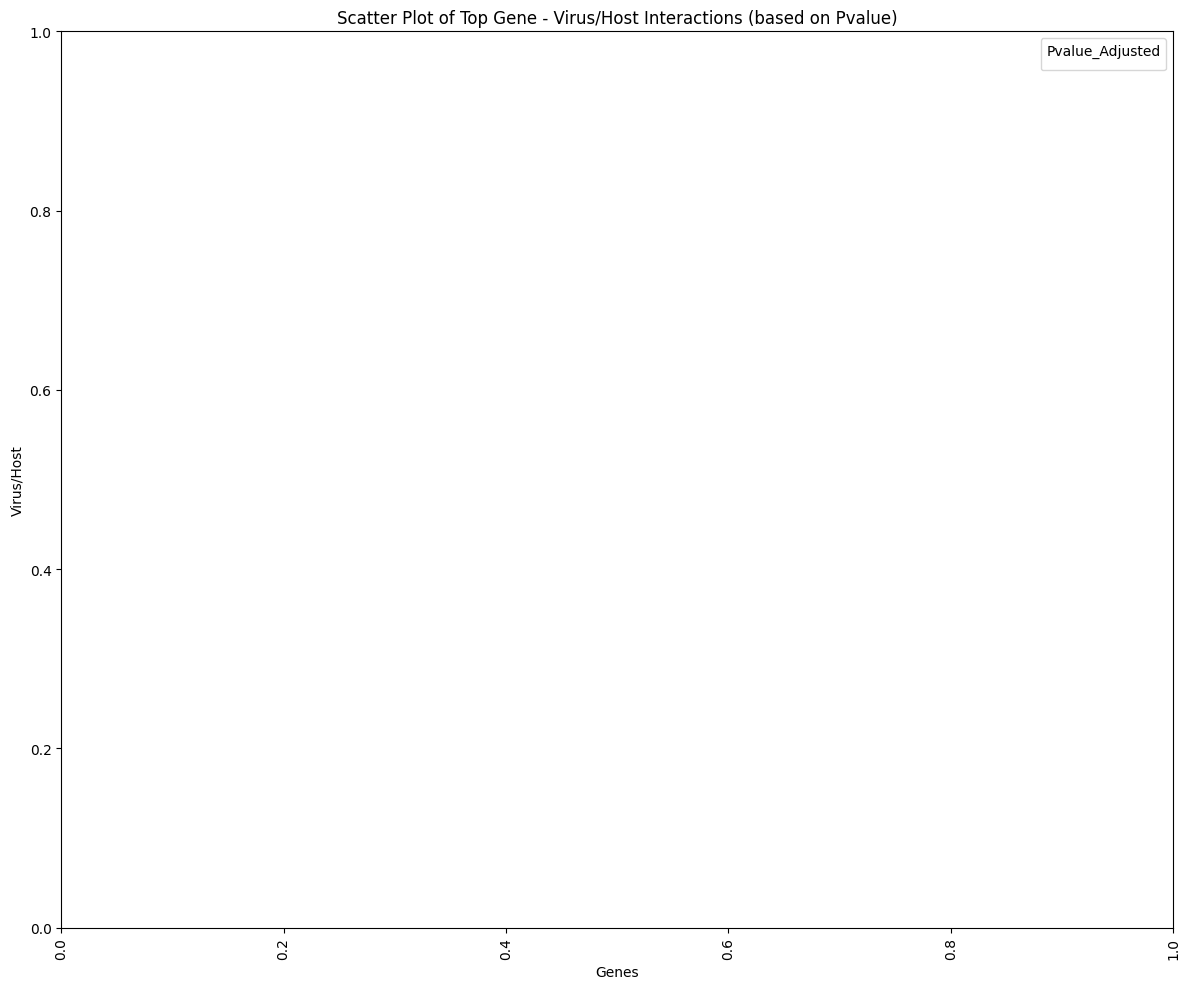

In [36]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=filtered_df, x='Genes', y='Virus_Host_Term', size='Virus_Host_Pvalue_Adjusted', hue='Virus_Host_Pvalue_Adjusted', palette='viridis', sizes=(20, 200))
plt.title('Scatter Plot of Top Gene - Virus/Host Interactions (based on Pvalue)')
plt.xlabel('Genes')
plt.ylabel('Virus/Host')
plt.legend(title='Pvalue_Adjusted')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('top50_gene_virus_host_scatterplot.png')
print("Scatter plot guardado como 'top50_gene_virus_host_scatterplot.png'")


Bar plot guardado como 'virus_host_interaction_counts.png'


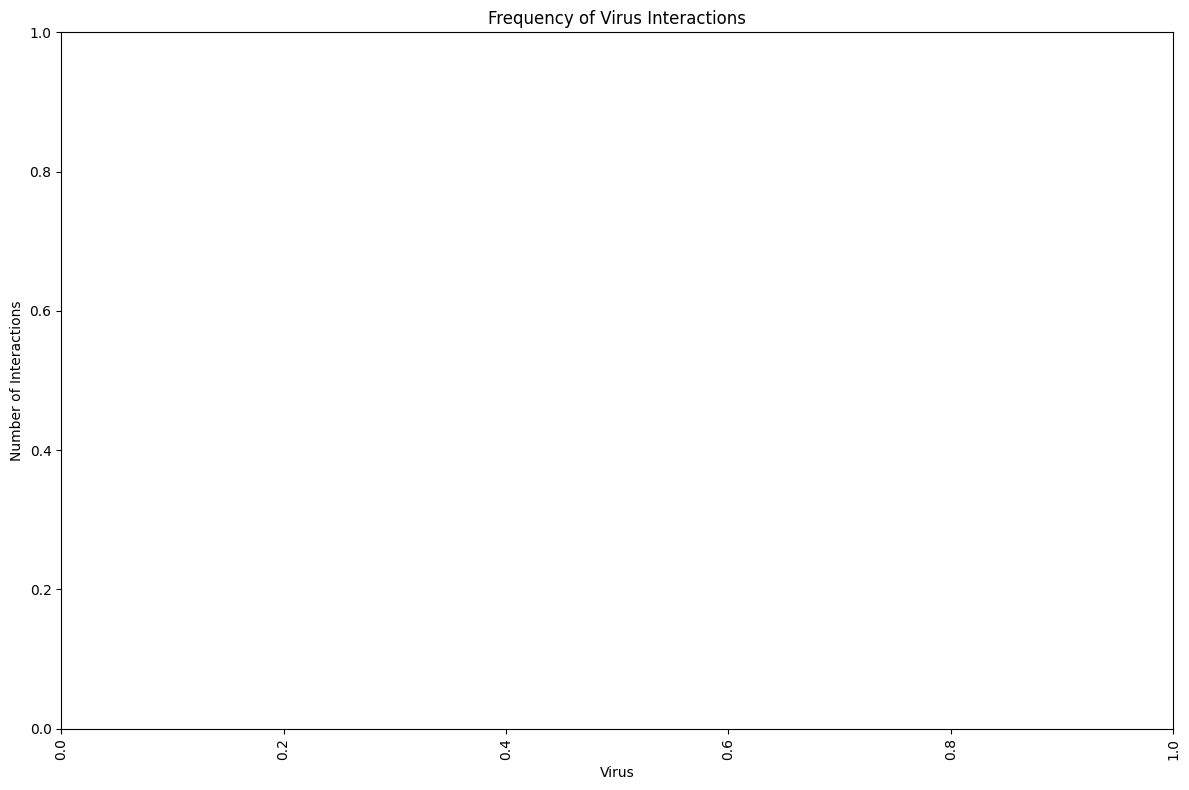

In [37]:

# Contar las interacciones por Virus_Host_Term
interaction_counts = filtered_df['Virus_Host_Term'].value_counts().reset_index()
interaction_counts.columns = ['Virus_Host_Term', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(data=interaction_counts, x='Virus_Host_Term', y='Count', palette='viridis')
plt.title('Frequency of Virus Interactions')
plt.xlabel('Virus')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('virus_host_interaction_counts.png')
print("Bar plot guardado como 'virus_host_interaction_counts.png'")


Obtener los archivos de nodos y aristas para crear la red en Cytoscape

In [39]:


# Cargar el archivo CSV
file_path = 'Integracion_con_patógenos_y_enfermedades_Fusobacterium_Nucleatum_Padj_menor_0.05.csv'
data = pd.read_csv(file_path)

# Crear listas para nodos y aristas
nodos = set()
aristas = []

# Iterar sobre cada fila del DataFrame
for index, row in data.iterrows():
    gene = row['Genes']
    nodos.add((gene, 'Gene'))  # Agregar el gen como nodo

    # Procesar las columnas de enfermedades
    for term, pvalue_column in zip(['DisGeNET_Term', 'GeDiPNet_Term', 'Orphanet_Term'],
                                   ['DisGeNET_Pvalue_Adjusted', 'GeDiPNet_Pvalue_Adjusted', 'Orphanet_Pvalue_Adjusted']):
        if pd.notna(row[term]):  # Verificar que no sea NaN
            enfermedades = row[term].split(';')  # Separar por punto y coma
            pvalues = str(row[pvalue_column]).split(';')  # Separar los valores P correspondientes
            for enfermedad, pvalue in zip(enfermedades, pvalues):
                if float(pvalue) < 0.05:  # Verificar que el valor P ajustado sea menor a 0.05
                    enfermedad_str = enfermedad.strip().replace(",", "")  # Eliminar comas
                    aristas.append((gene, enfermedad_str, float(pvalue)))  # Crear arista con pvalue
                    nodos.add((enfermedad_str, 'Disease'))  # Agregar enfermedad como nodo

    # Procesar las columnas de patógenos
    if pd.notna(row['Virus_Host_Term']):  # Verificar que no sea NaN
        patogenos = row['Virus_Host_Term'].split(';')  # Separar por punto y coma
        pvalues = str(row['Virus_Host_Pvalue_Adjusted']).split(';')  # Separar los valores P correspondientes
        for patogeno, pvalue in zip(patogenos, pvalues):
            if float(pvalue) < 0.05:  # Verificar que el valor P ajustado sea menor a 0.05
                patogeno_str = patogeno.strip().replace(",", "")  # Eliminar comas
                aristas.append((gene, patogeno_str, float(pvalue)))  # Crear arista con pvalue
                nodos.add((patogeno_str, 'Pathogen'))  # Agregar patógeno como nodo

# Crear DataFrame de nodos
nodos_df = pd.DataFrame(list(nodos), columns=['Id', 'Type'])

# Guardar el archivo de nodos
nodos_df.to_csv('nodos.csv', index=False)

# Crear DataFrame de aristas
aristas_df = pd.DataFrame(aristas, columns=['Source', 'Target', 'Pvalue_Adjusted'])

# Eliminar duplicados en aristas
aristas_df = aristas_df.drop_duplicates()

# Guardar el archivo de aristas
aristas_df.to_csv('aristas.csv', index=False)


In [1]:
import pandas as pd

# Cargar el archivo CSV con los datos filtrados y con Fold Change
file_path_fc = 'deSeqRes_filtrado_Fusobacterium_Nucleatum_with_FC.csv'
data_with_fc = pd.read_csv(file_path_fc)

# Renombrar la columna 'GeneSymbol' a 'Gene'
data_with_fc = data_with_fc.rename(columns={
    'GeneSymbol': 'Gene',
    'DirectionalFoldChange': 'FoldChange'
})

# Crear una nueva columna 'Regulation' basada en el signo de 'FoldChange'
data_with_fc['Regulation'] = data_with_fc['FoldChange'].apply(lambda x: 'UpRegulated' if x > 0 else 'DownRegulated')

# Tomar el valor absoluto de 'FoldChange'
data_with_fc['FoldChange'] = data_with_fc['FoldChange'].abs()

# Cargar el archivo CSV con los genes y sus categorías
file_path_categories = r'C:/Users/3060/OneDrive/Documentos/Tesis de Grado/Protocolo/5_Integración con datos de patógenos y enfermedades/Fusobacterium Nucleatum/Valor Padj menor a 0.05/genes_multiple_categories.csv'
genes_categories = pd.read_csv(file_path_categories)

# Combinar los datos de los genes con sus categorías y el Fold Change, eliminando los registros que no están en data_with_fc
combined_data = pd.merge(genes_categories, data_with_fc, on='Gene', how='inner')

# Ordenar los registros por el valor de "FoldChange" del más alto al más bajo
combined_data_sorted = combined_data.sort_values(by='FoldChange', ascending=False)

# Mostrar las primeras filas del dataframe combinado y ordenado
print(combined_data_sorted.head())

# Guardar el DataFrame combinado y ordenado en un nuevo archivo CSV
combined_data_sorted.to_csv('genes_multiple_categories_with_FC_sorted.csv', index=False)

# Guardar el DataFrame combinado y ordenado en un archivo Excel
combined_data_sorted.to_excel('genes_multiple_categories_with_FC_sorted.xlsx', index=False)

      Gene                                           Category  Log2FoldChange  \
16   SNAI2   Associated with Dysbiosis, Cancer, Rare Diseases       -1.960788   
17   THBS1                              Cancer, Rare Diseases       -1.658349   
8    LAMA3   Associated with Dysbiosis, Cancer, Rare Diseases       -1.335485   
1    CCND1   Associated with Dysbiosis, Cancer, Rare Diseases       -1.312102   
3   COL5A2  Associated with Dysbiosis, Cancer, Neurologica...        1.303911   

    FoldChange     Regulation  
16    3.892745  DownRegulated  
17    3.156550  DownRegulated  
8     2.523603  DownRegulated  
1     2.483031  DownRegulated  
3     2.468973    UpRegulated  


## Rare Diseases

In [1]:
import pandas as pd

# Cargar el archivo CSV con los datos filtrados y con Fold Change
file_path_fc = 'deSeqRes_filtrado_Fusobacterium_Nucleatum_with_FC.csv'
data_with_fc = pd.read_csv(file_path_fc)

# Renombrar la columna 'GeneSymbol' a 'Gene'
data_with_fc = data_with_fc.rename(columns={
    'GeneSymbol': 'Gene',
    'DirectionalFoldChange': 'FoldChange'
})

# Crear una nueva columna 'Regulation' basada en el signo de 'FoldChange'
data_with_fc['Regulation'] = data_with_fc['FoldChange'].apply(lambda x: 'UpRegulated' if x > 0 else 'DownRegulated')

# Tomar el valor absoluto de 'FoldChange'
data_with_fc['FoldChange'] = data_with_fc['FoldChange'].abs()

# Cargar el archivo CSV con los genes y sus categorías
file_path_categories = r'C:/Users/3060/OneDrive/Documentos/Tesis de Grado/Protocolo/5_Integración con datos de patógenos y enfermedades/Fusobacterium Nucleatum/Valor Padj menor a 0.05/genes_rare_diseases.csv'
genes_categories = pd.read_csv(file_path_categories)

# Combinar los datos de los genes con sus categorías y el Fold Change, eliminando los registros que no están en data_with_fc
combined_data = pd.merge(genes_categories, data_with_fc, on='Gene', how='inner')

# Ordenar los registros por el valor de "FoldChange" del más alto al más bajo
combined_data_sorted = combined_data.sort_values(by='FoldChange', ascending=False)

# Mostrar las primeras filas del dataframe combinado y ordenado
print(combined_data_sorted.head())

# Guardar el DataFrame combinado y ordenado en un nuevo archivo CSV
combined_data_sorted.to_csv('genes_rare_diseases_with_FC_sorted.csv', index=False)

# Guardar el DataFrame combinado y ordenado en un archivo Excel
combined_data_sorted.to_excel('genes_rare_diseases_with_FC_sorted.xlsx', index=False)

     Gene                                            Disease  Log2FoldChange  \
15  SNAI2  Myopathic Ehlers-Danlos syndrome ORPHA:536516,...       -1.960788   
16  THBS1  Familial primary localized cutaneous amyloidos...       -1.658349   
4    CPA4  Interstitial lung disease-nephrotic syndrome-e...        1.367245   
9   LAMA3  Interstitial lung disease-nephrotic syndrome-e...       -1.335485   
1   CCND1  Interstitial lung disease-nephrotic syndrome-e...       -1.312102   

    FoldChange     Regulation  
15    3.892745  DownRegulated  
16    3.156550  DownRegulated  
4     2.579775    UpRegulated  
9     2.523603  DownRegulated  
1     2.483031  DownRegulated  


## Neurological diseases

In [2]:
import pandas as pd

# Cargar el archivo CSV con los datos filtrados y con Fold Change
file_path_fc = 'deSeqRes_filtrado_Fusobacterium_Nucleatum_with_FC.csv'
data_with_fc = pd.read_csv(file_path_fc)

# Renombrar la columna 'GeneSymbol' a 'Gene'
data_with_fc = data_with_fc.rename(columns={
    'GeneSymbol': 'Gene',
    'DirectionalFoldChange': 'FoldChange'
})

# Crear una nueva columna 'Regulation' basada en el signo de 'FoldChange'
data_with_fc['Regulation'] = data_with_fc['FoldChange'].apply(lambda x: 'UpRegulated' if x > 0 else 'DownRegulated')

# Tomar el valor absoluto de 'FoldChange'
data_with_fc['FoldChange'] = data_with_fc['FoldChange'].abs()

# Cargar el archivo CSV con los genes y sus categorías
file_path_categories = r'C:/Users/3060/OneDrive/Documentos/Tesis de Grado/Protocolo/5_Integración con datos de patógenos y enfermedades/Fusobacterium Nucleatum/Valor Padj menor a 0.05/genes_neurological_diseases.csv'
genes_categories = pd.read_csv(file_path_categories)

# Combinar los datos de los genes con sus categorías y el Fold Change, eliminando los registros que no están en data_with_fc
combined_data = pd.merge(genes_categories, data_with_fc, on='Gene', how='inner')

# Ordenar los registros por el valor de "FoldChange" del más alto al más bajo
combined_data_sorted = combined_data.sort_values(by='FoldChange', ascending=False)

# Mostrar las primeras filas del dataframe combinado y ordenado
print(combined_data_sorted.head())

# Guardar el DataFrame combinado y ordenado en un nuevo archivo CSV
combined_data_sorted.to_csv('genes_neurological_diseases_with_FC_sorted.csv', index=False)

# Guardar el DataFrame combinado y ordenado en un archivo Excel
combined_data_sorted.to_excel('genes_neurological_diseases_with_FC_sorted.xlsx', index=False)

      Gene                                            Disease  Log2FoldChange  \
4    PCDH7  Rolandic epilepsy-speech dyspraxia syndrome OR...        1.547391   
2   COL5A2  Rolandic epilepsy-speech dyspraxia syndrome OR...        1.303911   
0   AMOTL2  Rolandic epilepsy-speech dyspraxia syndrome OR...       -1.291219   
5   PLSCR4  Rolandic epilepsy-speech dyspraxia syndrome OR...       -1.248942   
1  COL12A1  Rolandic epilepsy-speech dyspraxia syndrome OR...       -1.135501   

   FoldChange     Regulation  
4    2.922880    UpRegulated  
2    2.468973    UpRegulated  
0    2.447348  DownRegulated  
5    2.376670  DownRegulated  
1    2.196949  DownRegulated  


## Viral Diseases

In [14]:
import pandas as pd

# Cargar el archivo CSV con los datos filtrados y con Fold Change
file_path_fc = 'deSeqRes_filtrado_Fusobacterium_Nucleatum_with_FC.csv'
data_with_fc = pd.read_csv(file_path_fc)

# Renombrar la columna 'GeneSymbol' a 'Gene'
data_with_fc = data_with_fc.rename(columns={
    'GeneSymbol': 'Gene',
    'DirectionalFoldChange': 'FoldChange'
})

# Crear una nueva columna 'Regulation' basada en el signo de 'FoldChange'
data_with_fc['Regulation'] = data_with_fc['FoldChange'].apply(lambda x: 'UpRegulated' if x > 0 else 'DownRegulated')

# Tomar el valor absoluto de 'FoldChange'
data_with_fc['FoldChange'] = data_with_fc['FoldChange'].abs()

# Cargar el archivo CSV con los genes y sus categorías
file_path_categories = r'C:/Users/3060/OneDrive/Documentos/Tesis de Grado/Protocolo/5_Integración con datos de patógenos y enfermedades/Fusobacterium Nucleatum/Valor Padj menor a 0.05/genes_viral_diseases.csv'
genes_categories = pd.read_csv(file_path_categories)

# Combinar los datos de los genes con sus categorías y el Fold Change, eliminando los registros que no están en data_with_fc
combined_data = pd.merge(genes_categories, data_with_fc, on='Gene', how='inner')

# Ordenar los registros por el valor de "FoldChange" del más alto al más bajo
combined_data_sorted = combined_data.sort_values(by='FoldChange', ascending=False)

# Mostrar las primeras filas del dataframe combinado y ordenado
print(combined_data_sorted.head())

# Guardar el DataFrame combinado y ordenado en un nuevo archivo CSV
combined_data_sorted.to_csv('genes_viral_diseases_with_FC_sorted.csv', index=False)

# Guardar el DataFrame combinado y ordenado en un archivo Excel
combined_data_sorted.to_excel('genes_viral_diseases_with_FC_sorted.xlsx', index=False)

Empty DataFrame
Columns: [Gene, Disease, Log2FoldChange, FoldChange, Regulation]
Index: []


## Pathogenic Bacteria

In [15]:
import pandas as pd

# Cargar el archivo CSV con los datos filtrados y con Fold Change
file_path_fc = 'deSeqRes_filtrado_Fusobacterium_Nucleatum_with_FC.csv'
data_with_fc = pd.read_csv(file_path_fc)

# Renombrar la columna 'GeneSymbol' a 'Gene'
data_with_fc = data_with_fc.rename(columns={
    'GeneSymbol': 'Gene',
    'DirectionalFoldChange': 'FoldChange'
})

# Crear una nueva columna 'Regulation' basada en el signo de 'FoldChange'
data_with_fc['Regulation'] = data_with_fc['FoldChange'].apply(lambda x: 'UpRegulated' if x > 0 else 'DownRegulated')

# Tomar el valor absoluto de 'FoldChange'
data_with_fc['FoldChange'] = data_with_fc['FoldChange'].abs()

# Cargar el archivo CSV con los genes y sus categorías
file_path_categories = r'C:/Users/3060/OneDrive/Documentos/Tesis de Grado/Protocolo/5_Integración con datos de patógenos y enfermedades/Fusobacterium Nucleatum/Valor Padj menor a 0.05/genes_pathogenic_diseases.csv'
genes_categories = pd.read_csv(file_path_categories)

# Combinar los datos de los genes con sus categorías y el Fold Change, eliminando los registros que no están en data_with_fc
combined_data = pd.merge(genes_categories, data_with_fc, on='Gene', how='inner')

# Ordenar los registros por el valor de "FoldChange" del más alto al más bajo
combined_data_sorted = combined_data.sort_values(by='FoldChange', ascending=False)

# Mostrar las primeras filas del dataframe combinado y ordenado
print(combined_data_sorted.head())

# Guardar el DataFrame combinado y ordenado en un nuevo archivo CSV
combined_data_sorted.to_csv('genes_pathogenic_diseases_with_FC_sorted.csv', index=False)

# Guardar el DataFrame combinado y ordenado en un archivo Excel
combined_data_sorted.to_excel('genes_pathogenic_diseases_with_FC_sorted.xlsx', index=False)

Empty DataFrame
Columns: [Gene, Disease, Log2FoldChange, FoldChange, Regulation]
Index: []


## Associated with dysbiosis

In [17]:
import pandas as pd

# Cargar el archivo CSV con los datos filtrados y con Fold Change
file_path_fc = 'deSeqRes_filtrado_Fusobacterium_Nucleatum_with_FC.csv'
data_with_fc = pd.read_csv(file_path_fc)

# Renombrar la columna 'GeneSymbol' a 'Gene'
data_with_fc = data_with_fc.rename(columns={
    'GeneSymbol': 'Gene',
    'DirectionalFoldChange': 'FoldChange'
})

# Crear una nueva columna 'Regulation' basada en el signo de 'FoldChange'
data_with_fc['Regulation'] = data_with_fc['FoldChange'].apply(lambda x: 'UpRegulated' if x > 0 else 'DownRegulated')

# Tomar el valor absoluto de 'FoldChange'
data_with_fc['FoldChange'] = data_with_fc['FoldChange'].abs()

# Cargar el archivo CSV con los genes y sus categorías
file_path_categories = r'C:/Users/3060/OneDrive/Documentos/Tesis de Grado/Protocolo/5_Integración con datos de patógenos y enfermedades/Fusobacterium Nucleatum/Valor Padj menor a 0.05/genes_dysbiosis_diseases.csv'
genes_categories = pd.read_csv(file_path_categories)

# Combinar los datos de los genes con sus categorías y el Fold Change, eliminando los registros que no están en data_with_fc
combined_data = pd.merge(genes_categories, data_with_fc, on='Gene', how='inner')

# Ordenar los registros por el valor de "FoldChange" del más alto al más bajo
combined_data_sorted = combined_data.sort_values(by='FoldChange', ascending=False)

# Mostrar las primeras filas del dataframe combinado y ordenado
print(combined_data_sorted.head())

# Guardar el DataFrame combinado y ordenado en un nuevo archivo CSV
combined_data_sorted.to_csv('genes_dysbiosis_diseases_with_FC_sorted.csv', index=False)

# Guardar el DataFrame combinado y ordenado en un archivo Excel
combined_data_sorted.to_excel('genes_dysbiosis_diseases_with_FC_sorted.xlsx', index=False)

      Gene                                            Disease  Log2FoldChange  \
11   SNAI2  Pancreatic hypoplasia-diabetes-congenital hear...       -1.960788   
5    LAMA3  Pancreatic hypoplasia-diabetes-congenital hear...       -1.335485   
1    CCND1  Pancreatic hypoplasia-diabetes-congenital hear...       -1.312102   
3   COL5A2  Neonatal diabetes-congenital hypothyroidism-co...        1.303911   
0   AMOTL2  Neonatal diabetes-congenital hypothyroidism-co...       -1.291219   

    FoldChange     Regulation  
11    3.892745  DownRegulated  
5     2.523603  DownRegulated  
1     2.483031  DownRegulated  
3     2.468973    UpRegulated  
0     2.447348  DownRegulated  
